# PCA
### Aprendizagem Automática e Ciências de Dados

#### Grupo 4
#### Dinis Carraça Nº 14058 & José Feiteira Nº 14300

In [1]:
%reset -f

## Requirements

In [2]:
!pip install -r requirements.txt
!pip install --upgrade statsmodels
!pip install miceforest
!pip install pingouin
!pip install --upgrade pingouin

  Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl.metadata (9.5 kB)
Using cached statsmodels-0.14.4-cp313-cp313-win_amd64.whl (9.8 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.5
    Uninstalling statsmodels-0.14.5:
      Successfully uninstalled statsmodels-0.14.5
  Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl.metadata (9.8 kB)
Using cached statsmodels-0.14.5-cp313-cp313-win_amd64.whl (9.6 MB)
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.14.4
    Uninstalling statsmodels-0.14.4:
      Successfully uninstalled statsmodels-0.14.4


## Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import miceforest as mf
import pingouin as pg

from scipy.spatial import distance
from sklearn.covariance import MinCovDet
from sklearn.decomposition import PCA
from sklearn.covariance import MinCovDet, EmpiricalCovariance
from scipy.stats import chi2
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler

from miceforest import ImputationKernel

import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.discrete.discrete_model import Logit

from scipy.stats import skew, kurtosis


## Data Reading

In [81]:
df = pd.read_csv('pca_group_4.csv')
df_2 = pd.read_csv('pca_group_4.csv')

df

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,3.949454,5.673941,5.500851,6.838370,2.394955e+13,8.213288,4.583721,NaN,10.712480,4.302813,9.381756,4.389920
1,0.618467,NaN,3.796063,1.999873,5.218677,5.496677,5.459434,2.328595e+13,7.773575,5.572744,5.633490,11.269999,7.282001,9.643576,4.206871
2,0.618467,6.405489,3.878722,3.961220,2.478591,5.559581,4.178951,2.318226e+13,6.781985,6.300329,7.343624,10.587824,4.100798,9.133304,5.653438
3,0.618467,7.549743,4.774643,2.825635,4.047421,5.458533,3.216205,2.329317e+13,6.775012,4.928199,6.531811,11.394060,4.519294,8.791461,5.349756
4,0.618467,10.440767,9.578813,4.852759,4.912396,5.563851,4.062457,2.315365e+13,8.854584,7.492523,6.786275,11.350623,4.576925,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,3.596835,4.202992,5.491936,3.969249,2.315510e+13,6.993780,4.473312,6.510140,10.893950,4.482387,9.324372,5.084990
296,0.618467,9.043398,5.044051,1.838913,3.477297,5.502217,3.553777,2.288144e+13,7.666870,5.930969,6.030133,11.793351,7.505112,10.242859,2.515588
297,0.618467,9.662431,5.862714,4.045039,5.540337,5.523969,3.857879,2.324857e+13,6.582073,7.278113,6.231528,10.632968,4.439934,NaN,3.757774
298,0.618467,8.358244,5.531721,3.497520,3.305225,5.523526,2.730020,2.339173e+13,6.582961,6.931016,5.994316,11.775847,5.422842,9.691736,6.326503


#### **Gráfico Valores NAN**

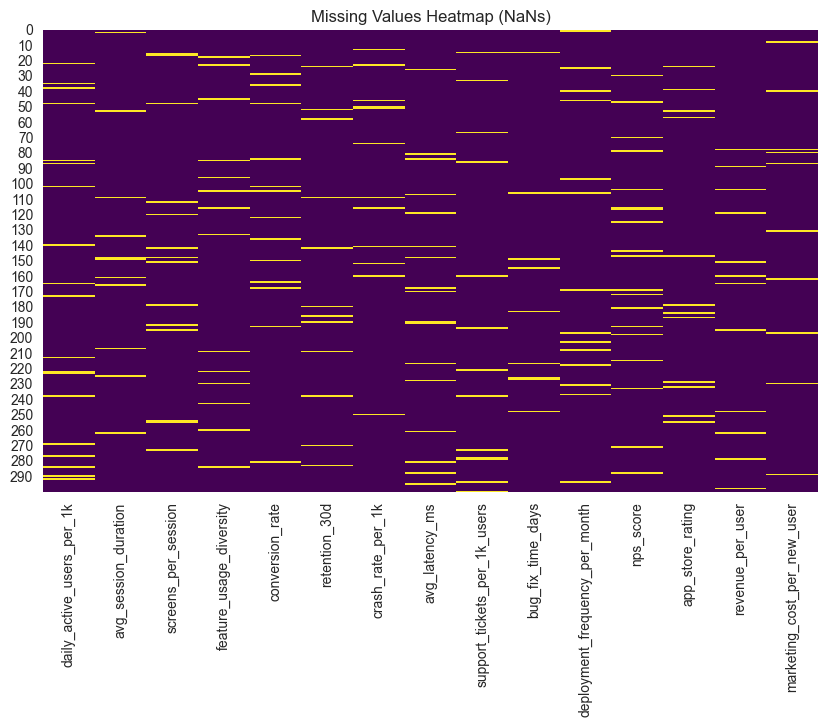

In [82]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap (NaNs)')
plt.show()

#### Quantidade de NAN por coluna

In [83]:
df.isna().sum()


daily_active_users_per_1k         19
avg_session_duration              11
screens_per_session               14
feature_usage_diversity           14
conversion_rate                   14
retention_30d                     12
crash_rate_per_1k                 12
avg_latency_ms                    17
support_tickets_per_1k_users      13
bug_fix_time_days                  9
deployment_frequency_per_month    14
nps_score                         19
app_store_rating                  12
revenue_per_user                  12
marketing_cost_per_new_user       10
dtype: int64

### Máximos e Mínimos de Cada Coluna

In [84]:
for coluna in df.columns:
    max_value = df[coluna].max()
    min_value = df[coluna].min()
    print(f"Column: {coluna}")
    print(f"  Max: {max_value}")
    print(f"  Min: {min_value}\n")

Column: daily_active_users_per_1k
  Max: 1.8554023348858053
  Min: 0.6184662683937715

Column: avg_session_duration
  Max: 25.085762109718367
  Min: 5.1219735902654575

Column: screens_per_session
  Max: 19.5047309944197
  Min: 2.5145310854064715

Column: feature_usage_diversity
  Max: 16.67501673235293
  Min: 0.5208095070025197

Column: conversion_rate
  Max: 20.430665537138907
  Min: 1.570704739096392

Column: retention_30d
  Max: 16.687608449982168
  Min: 5.43338324268638

Column: crash_rate_per_1k
  Max: 13.351597985140785
  Min: 1.1468935865716547

Column: avg_latency_ms
  Max: 70959621865739.47
  Min: 22568880952552.406

Column: support_tickets_per_1k_users
  Max: 21.746925071703195
  Min: 4.355425106373031

Column: bug_fix_time_days
  Max: 19.6483737663182
  Min: 2.283557347852432

Column: deployment_frequency_per_month
  Max: 18.021891989544987
  Min: 4.507504776631743

Column: nps_score
  Max: 33.079770697577345
  Min: 9.847327349067662

Column: app_store_rating
  Max: 19.7595

## 1. OOR
### Tratar os valores "Out Of Range" do dataset

Como é possível ver nas células anteriores existem colunas com valores que ultrapassam o seu suposto intervalo, assim é necessário formatar os dados para que estejam inseridos nos mesmos.

In [85]:
df.columns

Index(['daily_active_users_per_1k', 'avg_session_duration',
       'screens_per_session', 'feature_usage_diversity', 'conversion_rate',
       'retention_30d', 'crash_rate_per_1k', 'avg_latency_ms',
       'support_tickets_per_1k_users', 'bug_fix_time_days',
       'deployment_frequency_per_month', 'nps_score', 'app_store_rating',
       'revenue_per_user', 'marketing_cost_per_new_user'],
      dtype='object')

**Tratamento dos valores**

Para este caso definimos que o tratamento seria o seguinte:

*Feature Usage Diversity* -- O primeiro pensamento poderia ser o de colocar como Nan todos os valores acima de 1, o que no entanto para este dataframe não teria o melhor resultado dado que praticamente todos os valores desta coluna encontram-se acima de 1, assim vamos fazer um *rescale* aos dados;

*Nps Score* -- Colocar todos os valores abaixo de -100 e acima de 100 como Nan;

*App Store Rating* -- Fazer rescale aos dados para a escala desejada;

*Avg Latency (ms)* -- Alterar a escala através da transformação logarítmica, a partir desta conseguimos manter a unidade de medida desejada ao mesmo tempo que transformamos os dados em valores possíveis;

*Avg Session Duration, Screens per Session, Bug Fix Time (days), Deployment Frequency per Month, Revenue per User (€), Marketing Cost per New User (€), Daily Active Uses per 1k, Crash Rate per 1k e Support Tickets per 1k, Conversion Rate e Retention 30d* -- Deixar como está;

<br>

In [86]:
# Intervalo entre 0 e 1 (Com Rescale)
max_val = df['feature_usage_diversity'].max()
df['feature_usage_diversity'] = (df['feature_usage_diversity'] / max_val)

# Intervalo -100 e 100
df.loc[(df['nps_score'] > 100), 'nps_score'] = np.nan
df.loc[(df['nps_score'] < -100), 'nps_score'] = np.nan

# Intervalo entre 1 e 5 (Com Rescale)
df['app_store_rating'] = ((df['app_store_rating'] -df['app_store_rating'].min()) / (df['app_store_rating'].max() - df['app_store_rating'].min()) * 4 + 1)

# Transformação Logarítmica 
df["avg_latency_ms"] = np.log10(df["avg_latency_ms"])

df

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,0.236849,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,NaN,10.712480,1.609865,9.381756,4.389920
1,0.618467,NaN,3.796063,0.119932,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,2.263292,9.643576,4.206871
2,0.618467,6.405489,3.878722,0.237554,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,1.565557,9.133304,5.653438
3,0.618467,7.549743,4.774643,0.169453,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,1.657346,8.791461,5.349756
4,0.618467,10.440767,9.578813,0.291020,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,1.669986,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,0.215702,4.202992,5.491936,3.969249,13.364647,6.993780,4.473312,6.510140,10.893950,1.649251,9.324372,5.084990
296,0.618467,9.043398,5.044051,0.110280,3.477297,5.502217,3.553777,13.359483,7.666870,5.930969,6.030133,11.793351,2.312226,10.242859,2.515588
297,0.618467,9.662431,5.862714,0.242581,5.540337,5.523969,3.857879,13.366396,6.582073,7.278113,6.231528,10.632968,1.639940,NaN,3.757774
298,0.618467,8.358244,5.531721,0.209746,3.305225,5.523526,2.730020,13.369062,6.582961,6.931016,5.994316,11.775847,1.855522,9.691736,6.326503


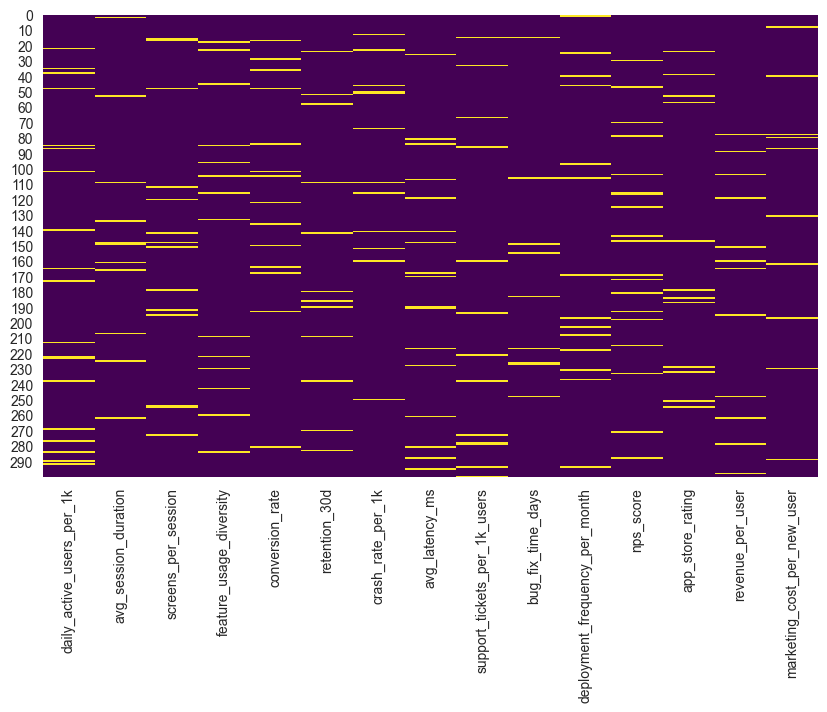

In [87]:
#Visualizar a quantidade de NAN's em cada coluna
plt.figure(figsize= (10, 6))
sns.heatmap(df.isnull(), cbar= False, cmap = "viridis")
plt.show()

### Numa outra abordagem em vez de tentarmos dar rescale às colunas com demasiados valores NAN, vamos efetuar um drop das mesma

**Tratamento dos valores**

Para este caso definimos que o tratamento seria o seguinte:

*Feature Usage Diversity* -- Todos os valores abaixo de zero e acima de 1 são colocados como NAN;

*Nps Score* -- Colocar todos os valores abaixo de -100 e acima de 100 como Nan;

*App Store Rating* -- Todos os valores abaixo de 1 e acima de 5 são colocados como NAN;

*Avg Latency (ms)* -- Alterar a escala através da transformação logarítmica, a partir desta conseguimos manter a unidade de medida desejada ao mesmo tempo que transformamos os dados em valores possíveis;

*Daily Active Uses per 1k, Crash Rate per 1k, Support Tickets per 1k, Conversion Rate e Retention 30d, Avg Session Duration, Screens per Session, Bug Fix Time (days), Deployment Frequency per Month, Revenue per User (€), Marketing Cost per New User (€)* -- Deixar como está;

<br>

In [88]:
# Intervalo entre 0 e 1 (Com NAN)
df_2.loc[(df_2['feature_usage_diversity'] > 1), 'feature_usage_diversity'] = np.nan
df_2.loc[(df_2['feature_usage_diversity'] < 0), 'feature_usage_diversity'] = np.nan

df_2.loc[(df_2['feature_usage_diversity'] >= 0.5), 'feature_usage_diversity'] = 1
df_2.loc[(df_2['feature_usage_diversity'] < 0.5), 'feature_usage_diversity'] = 0


# Intervalo -100 e 100
df_2.loc[(df_2['nps_score'] > 100), 'nps_score'] = np.nan
df_2.loc[(df_2['nps_score'] < -100), 'nps_score'] = np.nan

# Intervalo entre 1 e 5 (Com NAN)
df_2.loc[(df_2['app_store_rating'] > 5), 'app_store_rating'] = np.nan
df_2.loc[(df_2['app_store_rating'] < 1), 'app_store_rating'] = np.nan

# Transformação Logarítmica 
df_2["avg_latency_ms"] = np.log10(df_2["avg_latency_ms"])

df_2

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,NaN,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,NaN,10.712480,4.302813,9.381756,4.389920
1,0.618467,NaN,3.796063,NaN,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,NaN,9.643576,4.206871
2,0.618467,6.405489,3.878722,NaN,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,4.100798,9.133304,5.653438
3,0.618467,7.549743,4.774643,NaN,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,4.519294,8.791461,5.349756
4,0.618467,10.440767,9.578813,NaN,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,4.576925,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,NaN,4.202992,5.491936,3.969249,13.364647,6.993780,4.473312,6.510140,10.893950,4.482387,9.324372,5.084990
296,0.618467,9.043398,5.044051,NaN,3.477297,5.502217,3.553777,13.359483,7.666870,5.930969,6.030133,11.793351,NaN,10.242859,2.515588
297,0.618467,9.662431,5.862714,NaN,5.540337,5.523969,3.857879,13.366396,6.582073,7.278113,6.231528,10.632968,4.439934,NaN,3.757774
298,0.618467,8.358244,5.531721,NaN,3.305225,5.523526,2.730020,13.369062,6.582961,6.931016,5.994316,11.775847,NaN,9.691736,6.326503


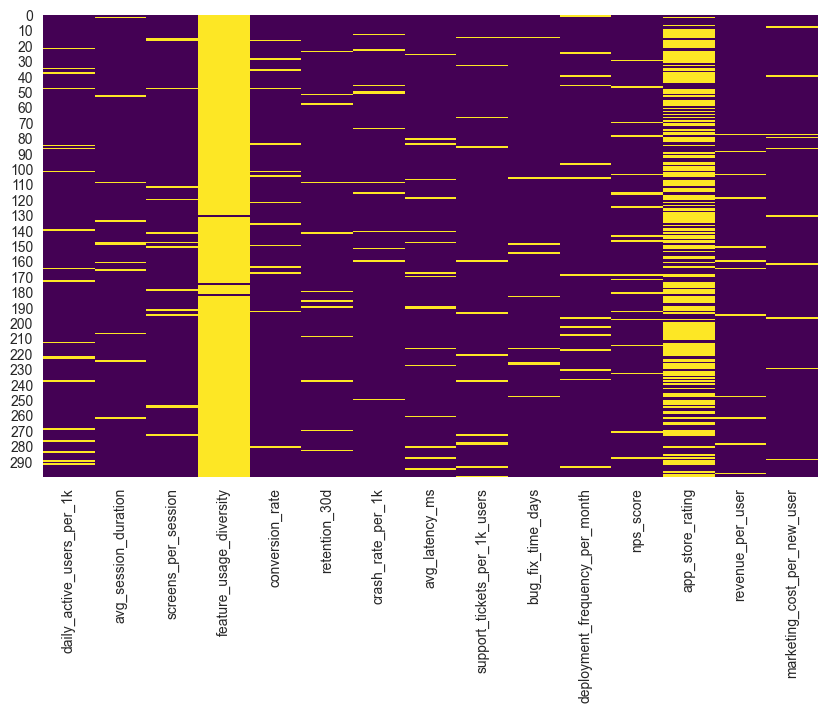

In [89]:
#Visualizar a quantidade de NAN's em cada coluna
plt.figure(figsize= (10, 6))
sns.heatmap(df_2.isnull(), cbar= False, cmap = "viridis")
plt.show()

## MISSINGS

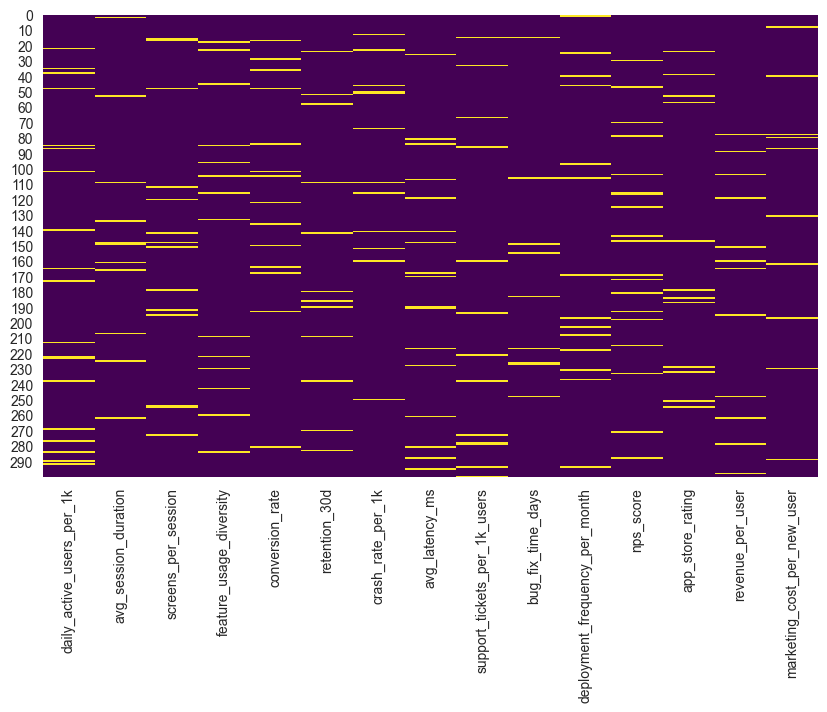

In [90]:
#Visualizar a quantidade de NAN's em cada coluna
plt.figure(figsize= (10, 6))
sns.heatmap(df.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [91]:
# número de NAN's atualizado
print("Número de NANs Atualizado para o dataframe 1 (com Rescale)")
df.isna().sum()

Número de NANs Atualizado para o dataframe 1 (com Rescale)


daily_active_users_per_1k         19
avg_session_duration              11
screens_per_session               14
feature_usage_diversity           14
conversion_rate                   14
retention_30d                     12
crash_rate_per_1k                 12
avg_latency_ms                    17
support_tickets_per_1k_users      13
bug_fix_time_days                  9
deployment_frequency_per_month    14
nps_score                         19
app_store_rating                  12
revenue_per_user                  12
marketing_cost_per_new_user       10
dtype: int64

In [92]:
print("Número de NANs Atualizado para o dataframe 2 (com NAN)")
df_2.isna().sum()

Número de NANs Atualizado para o dataframe 2 (com NAN)


daily_active_users_per_1k          19
avg_session_duration               11
screens_per_session                14
feature_usage_diversity           297
conversion_rate                    14
retention_30d                      12
crash_rate_per_1k                  12
avg_latency_ms                     17
support_tickets_per_1k_users       13
bug_fix_time_days                   9
deployment_frequency_per_month     14
nps_score                          19
app_store_rating                  178
revenue_per_user                   12
marketing_cost_per_new_user        10
dtype: int64

In [93]:
# Certificar de que não temos colunas vazias ou com muitos valores como NAN, se for esse o caso da primeira situação podemos retirá-las do dataframe
print("Dataframe 1")
empty_cols = df.columns[df.isnull().all()]
print("Colunas com todos os valores Null:", list(empty_cols))

threshold = 0.80
nan_cols = df.loc[:, df.isna().mean() >= threshold]
print("Colunas com mais de 80% dos valores como Nan:", list(nan_cols))

Dataframe 1
Colunas com todos os valores Null: []
Colunas com mais de 80% dos valores como Nan: []


In [94]:
print("Dataframe 2")
empty_cols = df_2.columns[df.isnull().all()]
print("Colunas com todos os valores Null:", list(empty_cols))

threshold = 0.80 
nan_cols = df_2.loc[:, df_2.isna().mean() >= threshold]
print("Colunas com mais de 80% dos valores como Nan:", list(nan_cols))


Dataframe 2
Colunas com todos os valores Null: []
Colunas com mais de 80% dos valores como Nan: ['feature_usage_diversity']


Visto que a coluna "Feature Usage Diversity" tem mais de 80% dos seus valores como NAN, vamos realizar um *drop* à mesma e retirá-la do *dataframe*

In [95]:
df_2 = df_2.drop('feature_usage_diversity', axis=1)

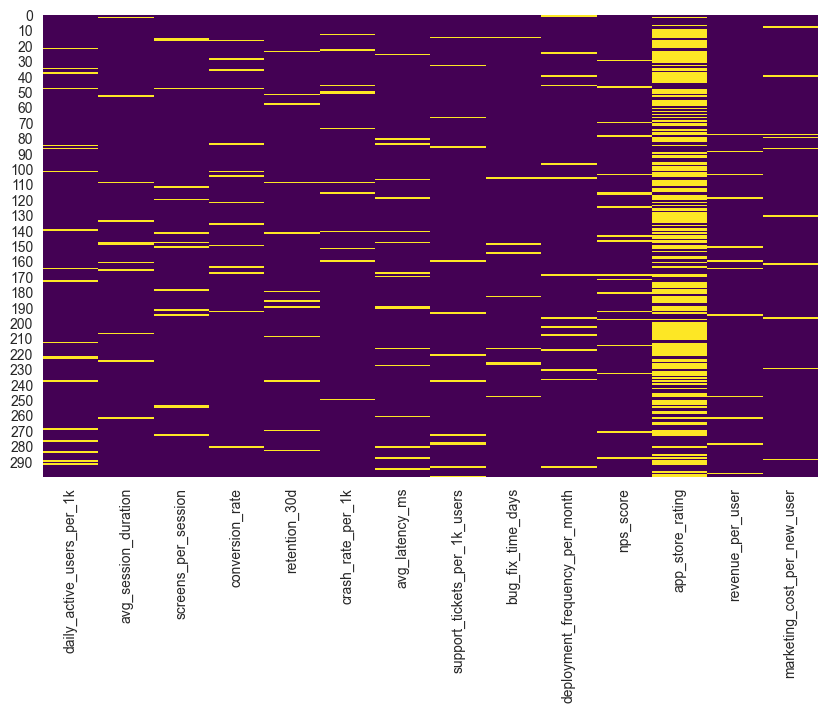

In [96]:
#Visualizar a quantidade de NAN's em cada coluna, dataframe 2 atualizado
plt.figure(figsize= (10, 6))
sns.heatmap(df_2.isnull(), cbar= False, cmap = "viridis")
plt.show()

## 2. Imputation
### Predictive Mean Matching

Para realizarmos todas as operações inerentes ao dataframe precisamos que não existam valores NAN, um dos processos que podemos realizar para alterar os valores é o **"Predictive Mean Matching"**.

Consiste em:
1. Criar uma *regressão* com os valores não NAN para a coluna
2. Calcular estimativas para cada valor da coluna
3. Encontrar os *k neighbours* que tenham valores perto da estimativa calculada
4. Escolher um deles para ser o novo valor
5. Repetir para cada coluna

### 2.1 PMM Dataframe 1

In [97]:
kernel = ImputationKernel(df, num_datasets=1, save_all_iterations_data=True, random_state=42)

# 5 iterações de MICE
kernel.mice(5, mean_match_candidates=3, mean_match_strategy="nearest")

# DataFrame imputado
df_imp = kernel.complete_data(0) # Dataframe sem os valores NAN
df_imp.head()


,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,0.236849,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,6.256699,10.712480,1.609865,9.381756,4.389920
1,0.618467,8.706847,3.796063,0.119932,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,2.263292,9.643576,4.206871
2,0.618467,6.405489,3.878722,0.237554,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,1.565557,9.133304,5.653438
3,0.618467,7.549743,4.774643,0.169453,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,1.657346,8.791461,5.349756
4,0.618467,10.440767,9.578813,0.291020,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,1.669986,10.723780,4.951948


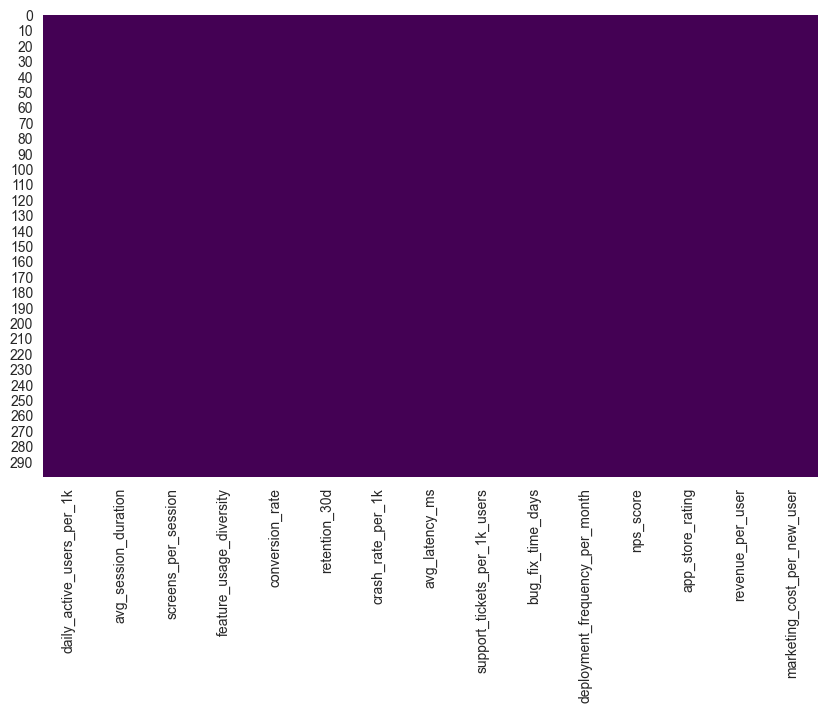

In [98]:
plt.figure(figsize= (10, 6))
sns.heatmap(df_imp.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [99]:
print("Valores NAN após PMM")
print("Antes:", df.isna().sum().sum())
print("Depois:", df_imp.isna().sum().sum())

Valores NAN após PMM
Antes: 202
Depois: 0


Depois de remover os valores *OOR* e substituir os valores *NAN* o dataset não tem mais valores não designados ou que não estejam contidos no intervalo desejado.

### 2.2 PMM Dataframe 2

In [100]:
kernel = ImputationKernel(df_2, num_datasets=1, save_all_iterations_data=True, random_state=42)

# 5 iterações de MICE
kernel.mice(5, mean_match_candidates=3, mean_match_strategy="nearest")

# DataFrame imputado
df_imp_2 = kernel.complete_data(0) # Dataframe sem os valores NAN
df_imp_2.head()

,daily_active_users_per_1k,avg_session_duration,screens_per_session,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,6.371389,10.712480,4.302813,9.381756,4.389920
1,0.618467,8.353909,3.796063,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,4.628378,9.643576,4.206871
2,0.618467,6.405489,3.878722,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,4.100798,9.133304,5.653438
3,0.618467,7.549743,4.774643,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,4.519294,8.791461,5.349756
4,0.618467,10.440767,9.578813,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,4.576925,10.723780,4.951948


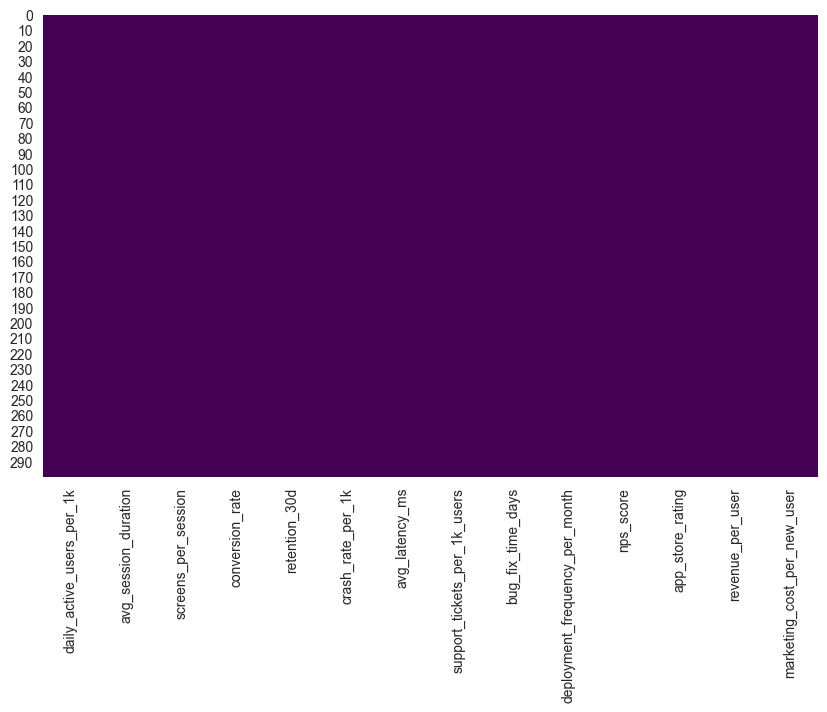

In [101]:
plt.figure(figsize= (10, 6))
sns.heatmap(df_imp_2.isnull(), cbar= False, cmap = "viridis")
plt.show()

In [102]:
print("Valores NAN após PMM")
print("Antes:", df_2.isna().sum().sum())
print("Depois:", df_imp_2.isna().sum().sum())

Valores NAN após PMM
Antes: 354
Depois: 0


## 3 Tratar Outliers

### 3.1 Outliers Dataframe 1

#### 3.1.1 Teste de Mardia

In [103]:
df_imp.dtypes
df_imp

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,0.618468,10.148114,6.071021,0.236849,5.673941,5.500851,6.838370,13.379297,8.213288,4.583721,6.256699,10.712480,1.609865,9.381756,4.389920
1,0.618467,8.706847,3.796063,0.119932,5.218677,5.496677,5.459434,13.367094,7.773575,5.572744,5.633490,11.269999,2.263292,9.643576,4.206871
2,0.618467,6.405489,3.878722,0.237554,2.478591,5.559581,4.178951,13.365156,6.781985,6.300329,7.343624,10.587824,1.565557,9.133304,5.653438
3,0.618467,7.549743,4.774643,0.169453,4.047421,5.458533,3.216205,13.367229,6.775012,4.928199,6.531811,11.394060,1.657346,8.791461,5.349756
4,0.618467,10.440767,9.578813,0.291020,4.912396,5.563851,4.062457,13.364620,8.854584,7.492523,6.786275,11.350623,1.669986,10.723780,4.951948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.618467,7.787067,5.666652,0.215702,4.202992,5.491936,3.969249,13.364647,6.993780,4.473312,6.510140,10.893950,1.649251,9.324372,5.084990
296,0.618467,9.043398,5.044051,0.110280,3.477297,5.502217,3.553777,13.359483,7.666870,5.930969,6.030133,11.793351,2.312226,10.242859,2.515588
297,0.618467,9.662431,5.862714,0.242581,5.540337,5.523969,3.857879,13.366396,6.582073,7.278113,6.231528,10.632968,1.639940,9.195296,3.757774
298,0.618467,8.358244,5.531721,0.209746,3.305225,5.523526,2.730020,13.369062,6.582961,6.931016,5.994316,11.775847,1.855522,9.691736,6.326503


In [104]:
def mardia_test(df):
    X = df.to_numpy()
    n, p = X.shape
    mean = X.mean(axis=0)
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)
    Xc = X - mean
    
    # Mahalanobis distances
    D = Xc @ S_inv @ Xc.T
    b1p = (np.sum(D**3)) / (n**2)
    k = np.trace((D @ D) / n)
    
    # Test statistics
    skew_chi2 = b1p * n / 6
    skew_pval = 1 - chi2.cdf(skew_chi2, df=p*(p+1)*(p+2)/6)
    
    kurt_z = (k - p*(p+2)) / np.sqrt(8*p*(p+2)/n)
    kurt_pval = 2 * (1 - chi2.cdf(abs(kurt_z), df=1))
    
    return pd.DataFrame({
        'Value': [b1p, k],
        'pval': [skew_pval, kurt_pval],
        'normal': [skew_pval >= 0.05, kurt_pval >= 0.05]
    }, index=['skewness', 'kurtosis'])

mardia = mardia_test(df_imp)
print(mardia)

               Value  pval  normal
skewness   667.36298   0.0   False
kurtosis  4470.05000   0.0   False


Como os p-values estão igual a zero significa que o dataset não está normalizado, logo vamos ter de realizar a normalização através do Yeo-Johnson como referido anteriormente.

#### 3.1.2 Yeo-Johson

In [105]:
# Apply Yeo–Johnson transformation
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = yeo.fit_transform(df_imp)

# Convert back to DataFrame with same column names
imputed_df_yeojohnson = pd.DataFrame(transformed_data, columns=df_imp.columns)


Depois de aplicarmos o Yeo-Johnson voltamos a realizar o teste de Mardia.

In [106]:
print("Teste de Mardia antes de Yeo-Johnson:")
mardia = mardia_test(df_imp)
print(mardia)
print()

print("Teste de Mardia depois de Yeo-Johnson:")
mardia = mardia_test(imputed_df_yeojohnson)
print(mardia)

Teste de Mardia antes de Yeo-Johnson:
               Value  pval  normal
skewness   667.36298   0.0   False
kurtosis  4470.05000   0.0   False

Teste de Mardia depois de Yeo-Johnson:
                Value  pval  normal
skewness   235.167574   0.0   False
kurtosis  4470.050000   0.0   False


Como podemos ver os p-values mantêm-se iguais, o que significa que vamos ter de utilzar a disância de Mahalanobis robusta

#### 3.1.3 Robust Mahalanobis Distance

A distância robusta de Mahalanobis minimiza o impacto que os outliars.

Para a calcular vamos utilizar o método MCD, *Minimum Covariance Determinant*,este funciona da seguinte forma:
1. Identifica *subsets* de *data* que estão mais concentrados
2. Calcula média e covariância do subset
3. Escolhe o subset que tenha a matriz de covariância com menor determinante



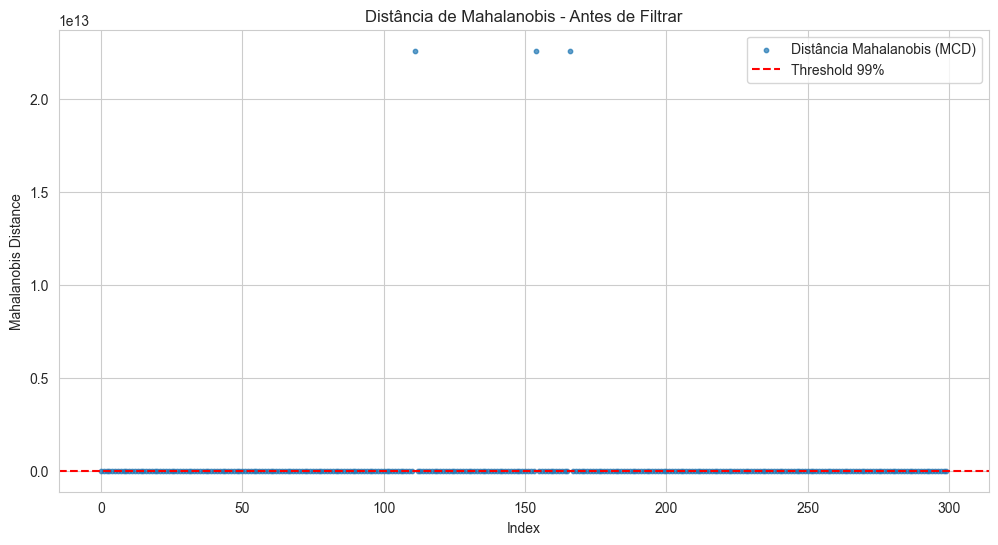

In [107]:
df_scaled = RobustScaler().fit_transform(df_imp)
mcd = MinCovDet(support_fraction=0.9, random_state=42).fit(df_scaled)

robust_md = mcd.mahalanobis(df_scaled)

# Limite (99%)
threshold = chi2.ppf(0.99, df=df_scaled.shape[1])

outliers_mask = robust_md > threshold

plt.figure(figsize=(12, 6))

plt.scatter(
    range(len(robust_md)), # The index of the data point for the x-axis
    robust_md,
    label="Distância Mahalanobis (MCD)",
    alpha=0.7,
    s=10 # Optional: sets the size of the points
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Antes de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()


Como podemos reparar na figura acima a distância calculada antes de filtrar atinge valores enormes, 10^13.

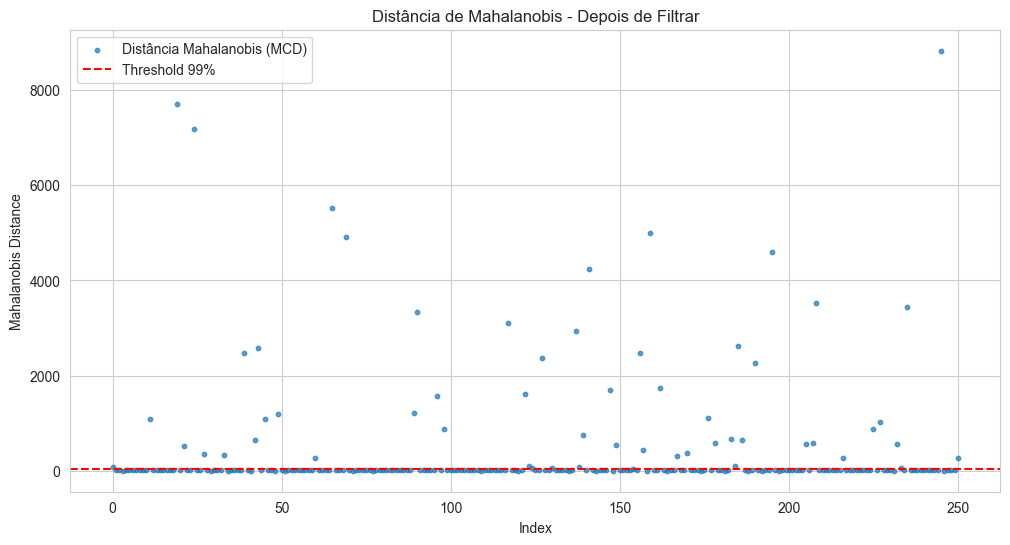

In [108]:
df_scaled = pd.DataFrame(df_scaled, columns=df_imp.columns)
df_clean = df_scaled.loc[~outliers_mask].reset_index(drop=True)
X_clean = df_clean.select_dtypes(include=[np.number])

scaler = RobustScaler()
X_scaled_clean = scaler.fit_transform(X_clean)

mcd_after = MinCovDet(support_fraction=0.8, random_state=42).fit(X_scaled_clean)
robust_md_after = mcd_after.mahalanobis(X_scaled_clean)

plt.figure(figsize=(12, 6))
plt.scatter(
    range(len(robust_md_after)), # The index of the data point for the x-axis
    robust_md_after,
    label="Distância Mahalanobis (MCD)",
    alpha=0.7,
    s=10 # Optional: sets the size of the points
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Depois de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()


Ao filtrarmos reduzimos a escala para a ordem dos milhares.

In [109]:
print("Tamanho original:", df_imp.shape)
print("Tamanho sem outliers:", df_clean.shape)

df_clean.head() # Dataframe sem Outliers

Tamanho original: (300, 15)
Tamanho sem outliers: (251, 15)


,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
0,1.365073,0.767327,0.261780,-0.032339,0.676673,-0.618089,1.463434,1.076442,0.883539,-0.825774,0.216563,-0.637735,-0.498733,0.016407,-0.014631
1,0.014407,-0.053756,-0.834279,-1.181517,0.398714,-0.686036,0.679254,-0.292061,0.577403,-0.187967,-0.608288,0.158461,1.145959,0.262016,-0.139845
2,-0.794565,-1.364828,-0.794455,-0.025404,-1.274230,0.337830,-0.048939,-0.509421,-0.112958,0.281242,1.655167,-0.815757,-0.610258,-0.216664,0.849675
3,-0.025550,-0.712952,-0.362806,-0.694773,-0.316390,-1.306883,-0.596438,-0.276956,-0.117813,-0.603625,0.580689,0.335633,-0.379222,-0.537343,0.641942
4,-0.008756,0.934050,1.951810,0.500113,0.211716,0.407337,-0.115187,-0.569544,1.330020,1.050071,0.917485,0.273601,-0.347407,1.275343,0.369823


In [110]:
df_clean.describe()

,daily_active_users_per_1k,avg_session_duration,screens_per_session,feature_usage_diversity,conversion_rate,retention_30d,crash_rate_per_1k,avg_latency_ms,support_tickets_per_1k_users,bug_fix_time_days,deployment_frequency_per_month,nps_score,app_store_rating,revenue_per_user,marketing_cost_per_new_user
count,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000,251.000000
mean,-0.067918,0.012277,0.010406,-0.041810,-0.073977,0.030147,0.030244,0.039012,0.009711,0.044255,0.034013,-0.008469,0.021213,-0.021064,-0.021370
std,0.656301,0.718204,0.702261,0.718461,0.672363,0.694797,0.642396,0.659706,0.700416,0.787700,0.820520,0.739259,0.656956,0.664766,0.773707
min,-1.926965,-1.843740,-1.451713,-2.053349,-1.828535,-1.716245,-1.773226,-1.815379,-1.802370,-2.183352,-2.098590,-1.873265,-1.877401,-1.415662,-2.337369
25%,-0.570083,-0.464554,-0.515467,-0.540179,-0.562896,-0.482010,-0.410106,-0.486516,-0.472857,-0.406893,-0.441828,-0.493825,-0.447294,-0.536775,-0.517505
50%,-0.018351,0.000350,-0.041089,-0.032339,-0.069789,-0.020171,0.032507,0.061110,0.028428,0.013886,-0.000154,-0.001835,-0.008657,-0.037425,0.009148
75%,0.383721,0.523719,0.504295,0.469295,0.410678,0.534098,0.526868,0.495835,0.479954,0.484429,0.512421,0.457424,0.538694,0.478191,0.475261
max,1.518978,1.866687,1.951810,1.862273,2.111677,1.986402,1.800379,1.863396,1.617451,2.999345,2.601954,2.474204,1.725319,1.923476,2.307287


### 3.2 Outliers Dataframe 2

#### 3.2.1 Teste de Mardia

In [111]:
def mardia_test(df):
    X = df.to_numpy()
    n, p = X.shape
    mean = X.mean(axis=0)
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)
    Xc = X - mean
    
    # Mahalanobis distances
    D = Xc @ S_inv @ Xc.T
    b1p = (np.sum(D**3)) / (n**2)
    k = np.trace((D @ D) / n)
    
    # Test statistics
    skew_chi2 = b1p * n / 6
    skew_pval = 1 - chi2.cdf(skew_chi2, df=p*(p+1)*(p+2)/6)
    
    kurt_z = (k - p*(p+2)) / np.sqrt(8*p*(p+2)/n)
    kurt_pval = 2 * (1 - chi2.cdf(abs(kurt_z), df=1))
    
    return pd.DataFrame({
        'Value': [b1p, k],
        'pval': [skew_pval, kurt_pval],
        'normal': [skew_pval >= 0.05, kurt_pval >= 0.05]
    }, index=['skewness', 'kurtosis'])

mardia_2 = mardia_test(df_imp_2)
print(mardia_2)

                Value  pval  normal
skewness   643.099899   0.0   False
kurtosis  4172.046667   0.0   False


#### 3.2.2 Yeo-Johson

In [112]:
# Apply Yeo–Johnson transformation
yeo = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_data = yeo.fit_transform(df_imp_2)

# Convert back to DataFrame with same column names
imputed_df_yeojohnson_2 = pd.DataFrame(transformed_data, columns=df_imp_2.columns)

In [113]:
print("Teste de Mardia antes de Yeo-Johnson:")
mardia = mardia_test(df_imp_2)
print(mardia)
print()

print("Teste de Mardia depois de Yeo-Johnson:")
mardia = mardia_test(imputed_df_yeojohnson_2)
print(mardia)

Teste de Mardia antes de Yeo-Johnson:
                Value  pval  normal
skewness   643.099899   0.0   False
kurtosis  4172.046667   0.0   False

Teste de Mardia depois de Yeo-Johnson:
                Value  pval  normal
skewness   216.952475   0.0   False
kurtosis  4172.046667   0.0   False


#### 3.2.3 Robust Mahalanobis Distance

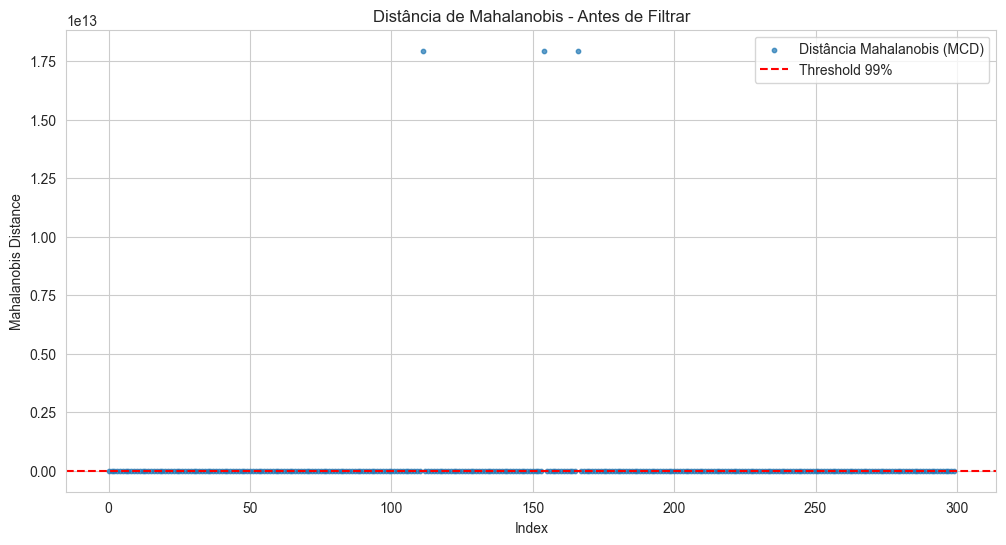

In [114]:
df_scaled_2 = RobustScaler().fit_transform(df_imp_2)
mcd = MinCovDet(support_fraction=0.9, random_state=42).fit(df_scaled_2)

robust_md_2 = mcd.mahalanobis(df_scaled_2)

# Limite (99%)
threshold = chi2.ppf(0.99, df=df_scaled_2.shape[1])

outliers_mask = robust_md_2 > threshold

plt.figure(figsize=(12, 6))
plt.scatter(
    range(len(robust_md_2)),
    robust_md_2,
    label="Distância Mahalanobis (MCD)",
    alpha=0.7,
    s=10
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Antes de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()

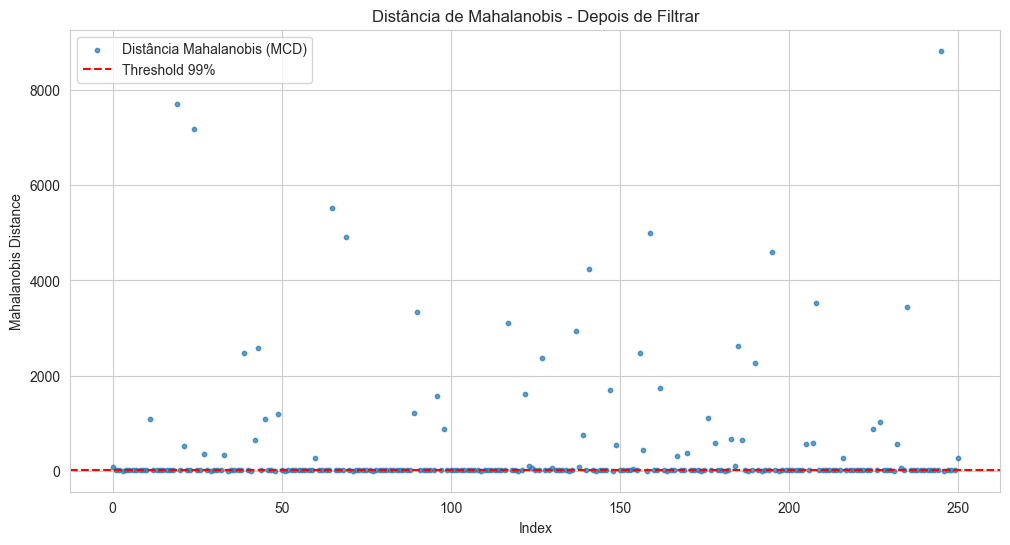

In [115]:
df_scaled = pd.DataFrame(df_scaled, columns=df_imp_2.columns)
df_clean_2 = df_scaled.loc[~outliers_mask].reset_index(drop=True)
X_clean_2 = df_clean.select_dtypes(include=[np.number])

scaler = RobustScaler()
X_scaled_clean_2 = scaler.fit_transform(X_clean_2)

mcd_after = MinCovDet(support_fraction=0.8, random_state=42).fit(X_scaled_clean_2)
robust_md_after = mcd_after.mahalanobis(X_scaled_clean_2)

plt.figure(figsize=(12, 6))
plt.scatter(
    range(len(robust_md_after)), # The index of the data point for the x-axis
    robust_md_after,
    label="Distância Mahalanobis (MCD)",
    alpha=0.7,
    s=10 # Optional: sets the size of the points
)
plt.axhline(threshold, color="red", linestyle="--", label="Threshold 99%")
plt.title("Distância de Mahalanobis - Depois de Filtrar")
plt.xlabel("Index")
plt.ylabel("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()

In [116]:
print("Tamanho original:", df_imp_2.shape)
print("Tamanho sem outliers:", df_clean_2.shape)

Tamanho original: (300, 14)
Tamanho sem outliers: (255, 14)


## 4. PCA

Agora, e depois de concluído o tratamento de dados sobre o *dataset* original, vamos passar para o *PCA*, *Principal Component Analysis*, este vai reduzir a dimensão do *dataset* mantendo grande parte da sua informação original.

Funciona da seguinte forma:
1. Identifica a "direção" das variâncias máximas no dataframe, estas passsam a ser os principais componentes do mesmo;
2. O primeiro componente, PC1, engloba a maior parte da variância, PC2 a segunda maior e por aí diante;


## 4.1 Escolher o Número de PCs Dataframe 1

Para escolher o número de PC que vamos calcular, iremos utilizar os seguintes métodos:
- Variabilidade Explicada
- Método de Kaiser
- Teste do Cotovelo

### 4.1.1 Variabilidade Explicada
Um dos métodos que podemos utilizar é o da Variabiliade Explicada, este funciona da seguinte forma:

1. Calcula-se a variância explicada por cada PC;
2. Depois, soma-se cumulativamente para ver quantos PCs são necessários para atingir, por exemplo, ≥ 70% da variabilidade total;

Nota: Pode ser arbitrário visto que o *threshold* escolhido não tem propriamente base fixa. 

Componentes necessárias para explicar 70%: 7


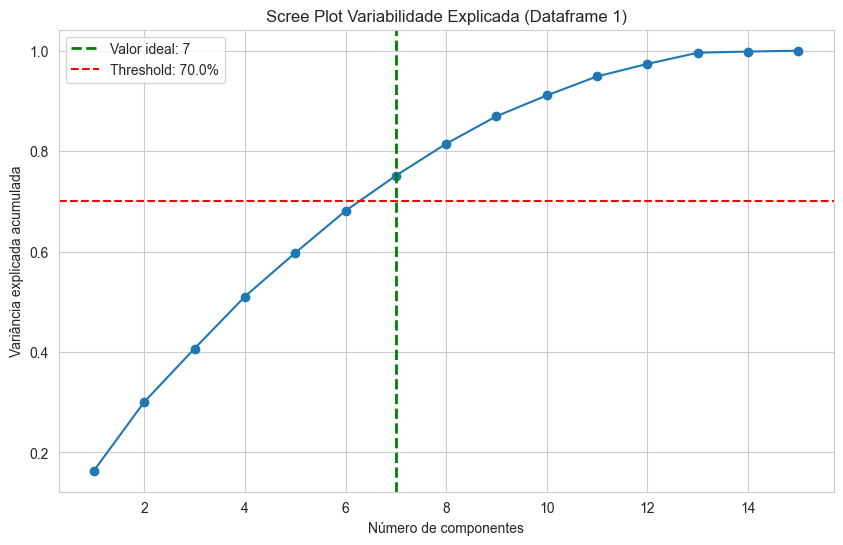

In [127]:
## Implementação Variabilidade Explicada

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

pca = PCA()
pca.fit(X_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

threshold = 0.70
n_components_70 = np.argmax(cumulative_variance >= threshold) + 1

print("Componentes necessárias para explicar 70%:", n_components_70)

x_axis = np.arange(1, len(cumulative_variance) + 1)
plt.figure(figsize=(10,6))
plt.plot(x_axis, cumulative_variance, marker='o')

# Melhor cotovelo (vermelho)
plt.axvline(n_components_70, color='green', linestyle='--', linewidth=2,
            label=f'Valor ideal: {n_components_70}')

plt.axhline(y=threshold, color='r', linestyle='--', label = f'Threshold: {threshold * 100}%')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada acumulada')
plt.legend()
plt.grid(True)
plt.title('Scree Plot Variabilidade Explicada (Dataframe 1)')
plt.show()

### Ao analisar a figura acima chegamos à conclusão de que o número de PCs necessário são, a partir do método da Variabilidade Explicada, **7**.

### 4.1.2 Método de Kaiser
Outro método que podemos utilizar é o de Keiser, que funciona da seguinte forma:
1. Calcula-se a variância de cada PC;
2. Cada PC que tiver um valor superior a 1 é um PC em que o seu uso é benéfico;
3. A soma total do número de PCs com valor superior a 1 é o número de PCs a utilizar;

Nota: Pode manter demasiados PCs em datasets muito grandes.

### Nota: Porquê escolher apenas os eigenvalues maiores do que 1?
    - Como descrito acima o método de Kaiser calcula a variância de cada componente principal, esta nada mais é do que a diagonal da matriz de covariância.
    - A matriz de covariância é criada através da seguinte fórmula:
$$
S = \frac{1}{n-1} \tilde{X}^\top \tilde{X} \quad (p \times p)
$$
    
    - Para uma variável padronizada a diag(S) = 1, ou seja a variância é 1.
    
    - Logo ao fazermos o cálculo para as nossas variáveis se:
    
        -- eigenvalue = 1: O componente explica tanto quanto uma única variável original;
        
        -- eigenvalue > 1: O componente explica mais do que uma variável original; 
        
        -- eigenvalue < 1: O componente explica menos do que uma variável original e, consequentemente, não compensa mantê-lo:
        
    - Visto que ao realizarmos o PCA queremos utilizar o menor número de PCs, mantendo a cobertura total da informação do dataframe, vamos optar por apenas escolher os eigenvalues maiores do que um.
   
    

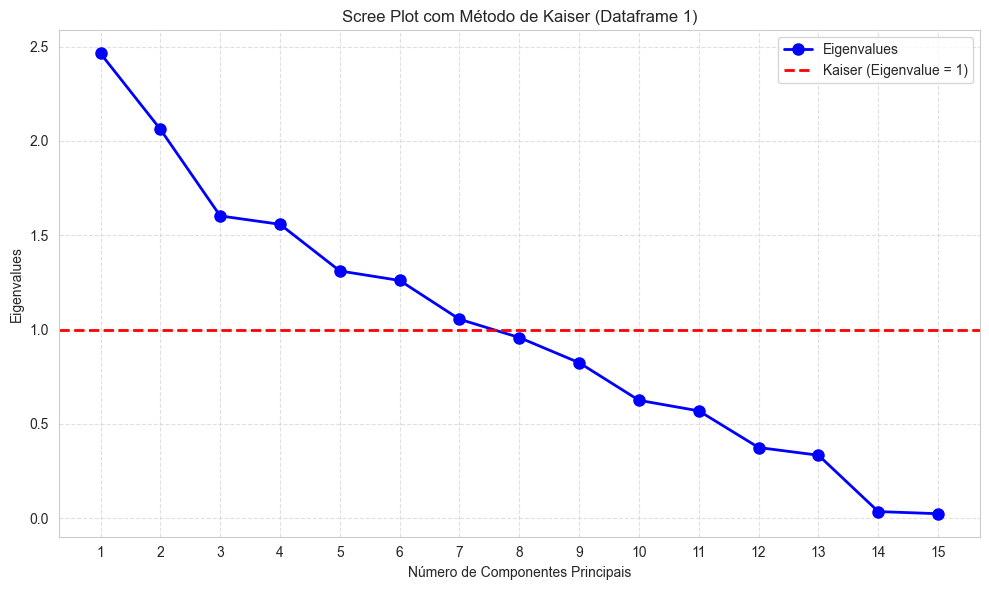

Número ótimo de componentes pelo Método de Kaiser: 7


In [142]:
## Implementação Método de Kaiser

df_numeric = df_clean.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA()
pca.fit(df_scaled)

# Variância individual e eigenvalues
exp_var_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

optimal_kaiser = np.sum(eigenvalues > 1)

# Scree Plot com linha horizontal em y = 1 (Critério de Kaiser)
plt.figure(figsize=(10,6))
x_axis = range(1, len(eigenvalues) + 1)

plt.plot(x_axis, eigenvalues, 'bo-', linewidth=2, markersize=8, label='Eigenvalues')
plt.axhline(1, color='r', linestyle='--', linewidth=2, label='Kaiser (Eigenvalue = 1)')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot com Método de Kaiser (Dataframe 1)')
plt.xticks(x_axis)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


print("Número ótimo de componentes pelo Método de Kaiser:", optimal_kaiser)

### Chegamos à conclusão de que o número de PCs necessário são, a partir do método de Kaiser, **7**.

### 4.1.3 Método do Cotovelo

O último método utilizado é o do Cotovelo:
1. Criamos um gráfico com as variâncias de cada PC por ordem decrescente;
2. Encontramos o "cotovelo" no mesmo, isto é, o ponto onde o declive da reta diminui significativamente;
3. O número de PCs escolhido é número destes que estejam antes do cotovelo

Nota: Nem sempre o cotovelo é evidente, sendo o método às vezes subjetivo.

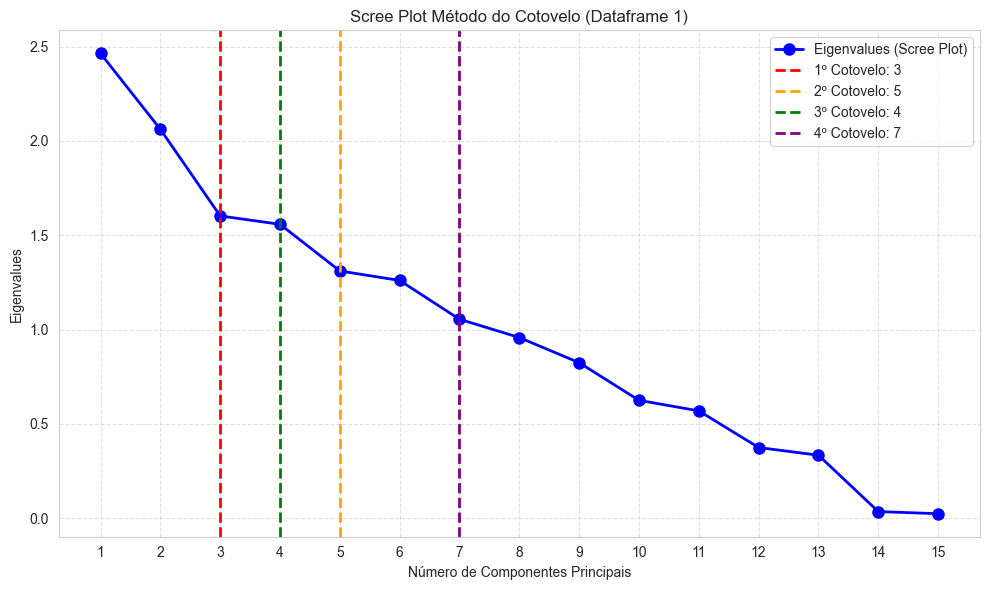

In [129]:
## Implementação Método do Cotovelo

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clean)

pca = PCA()
pca.fit(df_scaled)

# Variância individual e acumulada
exp_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(exp_var_ratio)
eigenvalues = pca.explained_variance_

# Scree Plot

y_values = eigenvalues
n_points = len(y_values)

all_coords = np.vstack((range(1, n_points+1), y_values)).T

# Cálculo do cotovelo
first_point = all_coords[0]
last_point = all_coords[-1]
line_vec = last_point - first_point
line_vec_norm = line_vec / np.linalg.norm(line_vec)

vec_from_first = all_coords - first_point
scalar_product = np.sum(vec_from_first * np.tile(line_vec_norm, (n_points,1)), axis=1)
vec_on_line = np.outer(scalar_product, line_vec_norm)
vec_to_line = vec_from_first - vec_on_line
dist_to_line = np.linalg.norm(vec_to_line, axis=1)

optimal_components = np.argmax(dist_to_line) + 1


# Encontrar o segundo melhor ponto (segundo maior dist_to_line)
sorted_indices = np.argsort(dist_to_line)[::-1]  # ordenar do maior para o menor
best_idx = sorted_indices[0]     # melhor cotovelo
second_idx = sorted_indices[1]   # segundo melhor cotovelo
terceiro_idx = sorted_indices[2]   # segundo melhor cotovelo
quarto_idx = sorted_indices[3]   # segundo melhor cotovelo

optimal_components = best_idx + 1
second_best_components = second_idx + 1
terceiro_best_components = terceiro_idx + 1
quarto_best_components = quarto_idx + 1

# Plot
plt.figure(figsize=(10,6))
x_axis = range(1, n_points+1)

plt.plot(x_axis, y_values, 'bo-', linewidth=2, markersize=8, label='Eigenvalues (Scree Plot)')

# Melhor cotovelo (vermelho)
plt.axvline(optimal_components, color='r', linestyle='--', linewidth=2,
            label=f'1º Cotovelo: {optimal_components}')

# Segundo cotovelo (laranja)
plt.axvline(second_best_components, color='orange', linestyle='--', linewidth=2,
            label=f'2º Cotovelo: {second_best_components}')

# Segundo cotovelo (laranja)
plt.axvline(terceiro_best_components, color='green', linestyle='--', linewidth=2,
            label=f'3º Cotovelo: {terceiro_best_components}')

# Segundo cotovelo (laranja)
plt.axvline(quarto_best_components, color='purple', linestyle='--', linewidth=2,
            label=f'4º Cotovelo: {quarto_best_components}')

plt.xlabel('Número de Componentes Principais')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot Método do Cotovelo (Dataframe 1)')
plt.xticks(x_axis)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Ao analisar a figura acima chegamos à conclusão de que o número de PCs necessário são, a partir do método do Cotovelo, **3, 4, 5 ou 7**.

### 4.2 Escolher Número de PCs Dataframe 2

### 4.2.1 Variabilidade Explicada

Componentes necessárias para explicar 70%: 7


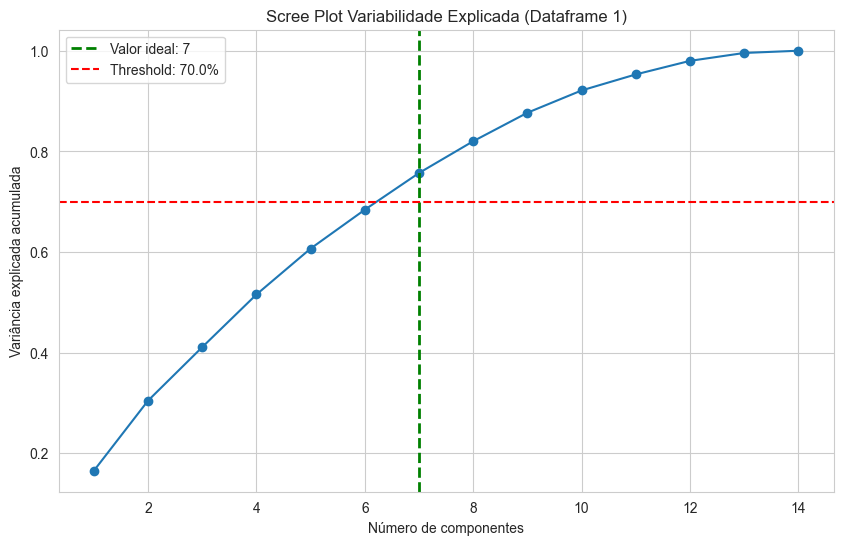

In [130]:
## Implementação Variabilidade Explicada

scaler = StandardScaler()
X_scaled_2 = scaler.fit_transform(df_clean_2)

pca = PCA()
pca.fit(X_scaled_2)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

threshold = 0.70
n_components_70 = np.argmax(cumulative_variance >= threshold) + 1

print("Componentes necessárias para explicar 70%:", n_components_70)

x_axis = np.arange(1, len(cumulative_variance) + 1)
plt.figure(figsize=(10,6))
plt.plot(x_axis, cumulative_variance, marker='o')

# Melhor cotovelo (vermelho)
plt.axvline(n_components_70, color='green', linestyle='--', linewidth=2,
            label=f'Valor ideal: {n_components_70}')

plt.axhline(y=threshold, color='r', linestyle='--', label = f'Threshold: {threshold * 100}%')
plt.xlabel('Número de componentes')
plt.ylabel('Variância explicada acumulada')
plt.legend()
plt.grid(True)
plt.title('Scree Plot Variabilidade Explicada (Dataframe 1)')
plt.show()

### Ao analisar a figura acima chegamos à conclusão de que o número de PCs necessário são, a partir do método da Variabilidade Explicada, **7**.

### 4.2.2 Método de Kaiser

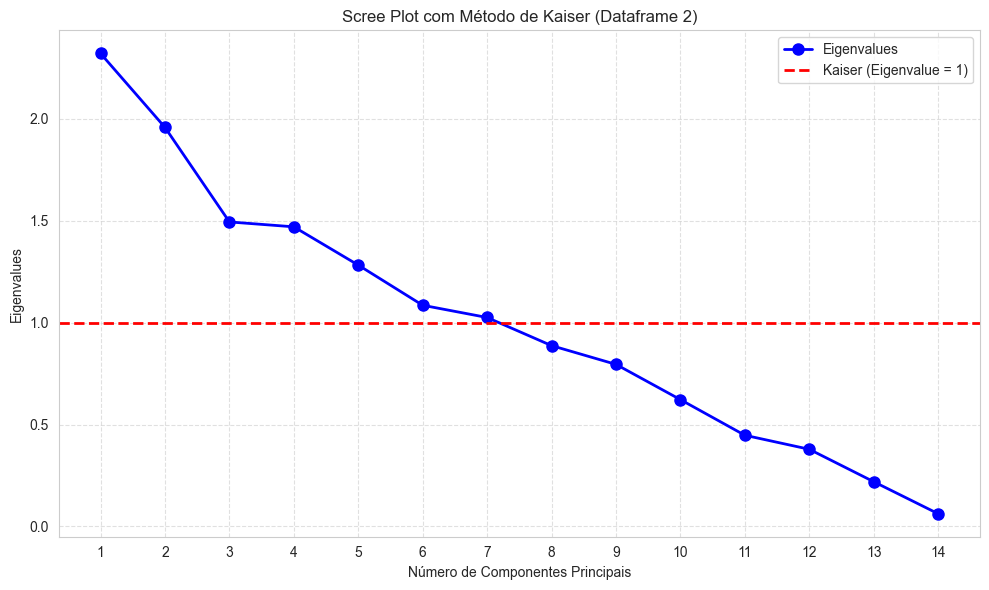

Número ótimo de componentes pelo Método de Kaiser: 7


In [143]:
## Implementação Método de Kaiser

df_numeric_2 = df_clean_2.select_dtypes(include=[np.number])

scaler = StandardScaler()
df_scaled_2 = scaler.fit_transform(df_numeric_2)

pca = PCA()
pca.fit(df_scaled_2)

# Variância individual e eigenvalues
exp_var_ratio = pca.explained_variance_ratio_
eigenvalues = pca.explained_variance_

optimal_kaiser = np.sum(eigenvalues > 1)

# Scree Plot com linha horizontal em y = 1 (Critério de Kaiser)
plt.figure(figsize=(10,6))
x_axis = range(1, len(eigenvalues) + 1)

plt.plot(x_axis, eigenvalues, 'bo-', linewidth=2, markersize=8, label='Eigenvalues')
plt.axhline(1, color='r', linestyle='--', linewidth=2, label='Kaiser (Eigenvalue = 1)')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot com Método de Kaiser (Dataframe 2)')
plt.xticks(x_axis)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


print("Número ótimo de componentes pelo Método de Kaiser:", optimal_kaiser)

### Chegamos à conclusão de que o número de PCs necessário são, a partir do método de Kaiser, **7**.

### 4.2.3 Método do Cotovelo

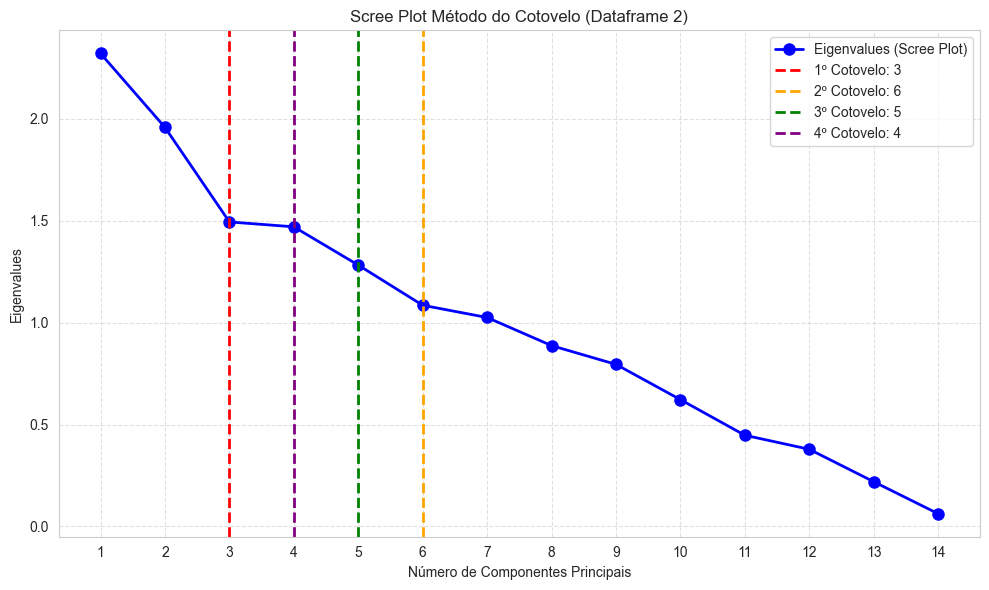

In [133]:
## Implementação Método do Cotovelo

scaler = StandardScaler()
df_scaled_2 = scaler.fit_transform(df_clean_2)

pca = PCA()
pca.fit(df_scaled_2)

# Variância individual e acumulada
exp_var_ratio = pca.explained_variance_ratio_
cum_var_ratio = np.cumsum(exp_var_ratio)
eigenvalues = pca.explained_variance_

# Scree Plot

y_values = eigenvalues
n_points = len(y_values)

all_coords = np.vstack((range(1, n_points+1), y_values)).T

# Cálculo do cotovelo
first_point = all_coords[0]
last_point = all_coords[-1]
line_vec = last_point - first_point
line_vec_norm = line_vec / np.linalg.norm(line_vec)

vec_from_first = all_coords - first_point
scalar_product = np.sum(vec_from_first * np.tile(line_vec_norm, (n_points,1)), axis=1)
vec_on_line = np.outer(scalar_product, line_vec_norm)
vec_to_line = vec_from_first - vec_on_line
dist_to_line = np.linalg.norm(vec_to_line, axis=1)

optimal_components = np.argmax(dist_to_line) + 1

# Lista de indices ordenada do maior para o menor
sorted_indices = np.argsort(dist_to_line)[::-1]  

# 4 melhores cotovelos
best_idx = sorted_indices[0]     
second_idx = sorted_indices[1]   
terceiro_idx = sorted_indices[2]  
quarto_idx = sorted_indices[3]   

optimal_components = best_idx + 1
second_best_components = second_idx + 1
terceiro_best_components = terceiro_idx + 1
quarto_best_components = quarto_idx + 1

# Plot
plt.figure(figsize=(10,6))
x_axis = range(1, n_points+1)

plt.plot(x_axis, y_values, 'bo-', linewidth=2, markersize=8, label='Eigenvalues (Scree Plot)')

# Melhor cotovelo
plt.axvline(optimal_components, color='r', linestyle='--', linewidth=2,
            label=f'1º Cotovelo: {optimal_components}')

# Segundo cotovelo
plt.axvline(second_best_components, color='orange', linestyle='--', linewidth=2,
            label=f'2º Cotovelo: {second_best_components}')

# Terceiro cotovelo 
plt.axvline(terceiro_best_components, color='green', linestyle='--', linewidth=2,
            label=f'3º Cotovelo: {terceiro_best_components}')

# Quarto cotovelo
plt.axvline(quarto_best_components, color='purple', linestyle='--', linewidth=2,
            label=f'4º Cotovelo: {quarto_best_components}')

plt.xlabel('Número de Componentes Principais')
plt.ylabel('Eigenvalues')
plt.title('Scree Plot Método do Cotovelo (Dataframe 2)')
plt.xticks(x_axis)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


### Ao analisar a figura acima chegamos à conclusão de que o número de PCs necessário são, a partir do método do Cotovelo, **3, 4, 5 ou 6**.

## 4.3.1 PCA Dataframe 1 (Variáveis com Rescale)

Do ponto 4.1 conseguimos obter os seguintes possíveis números para a quantidade de PCs a ser escolhida:
- Método da Variabilidade Explicada: **7**
- Método de Kaiser: **7**
- Método do Cotovelo (Scree Plot): **3,4,5,7**

### Assim iremos escolher 7 PCs para o PCA 1, visto que é o valor que é comun aos três métodos.

In [134]:
df = df_clean

X = df.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA - 7 componentes neste caso
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])

# Peso de cada variável em cada PC
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'], index=X.columns)

top_n = 15 # Número de Variáveis a visualizar
all_top_vars = []

for pc in loadings.columns:
    print(f"\nMaiores Contribuintes do {pc}:")
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    print(sorted_loadings.head(top_n))
    # Variáveis para o HeatMap
    all_top_vars.extend(sorted_loadings.head(top_n).index)




Maiores Contribuintes do PC1:
conversion_rate                   0.408612
revenue_per_user                  0.351707
feature_usage_diversity           0.343468
crash_rate_per_1k                 0.322582
retention_30d                     0.315830
support_tickets_per_1k_users      0.309235
marketing_cost_per_new_user       0.283784
nps_score                         0.269258
screens_per_session               0.206736
avg_session_duration              0.165178
deployment_frequency_per_month    0.157221
app_store_rating                  0.138077
bug_fix_time_days                 0.127144
avg_latency_ms                    0.081866
daily_active_users_per_1k         0.047179
Name: PC1, dtype: float64

Maiores Contribuintes do PC2:
crash_rate_per_1k                 0.396287
avg_session_duration              0.391249
nps_score                         0.347796
avg_latency_ms                    0.345114
screens_per_session               0.344557
app_store_rating                  0.328456
daily_act

Depois do PCA ser aplicado podemos ver as tabelas de cada PC e as variáveis que têm mais peso no mesmo.

Através do mapa de calor a seguir podemos obter uma melhor representação visual.


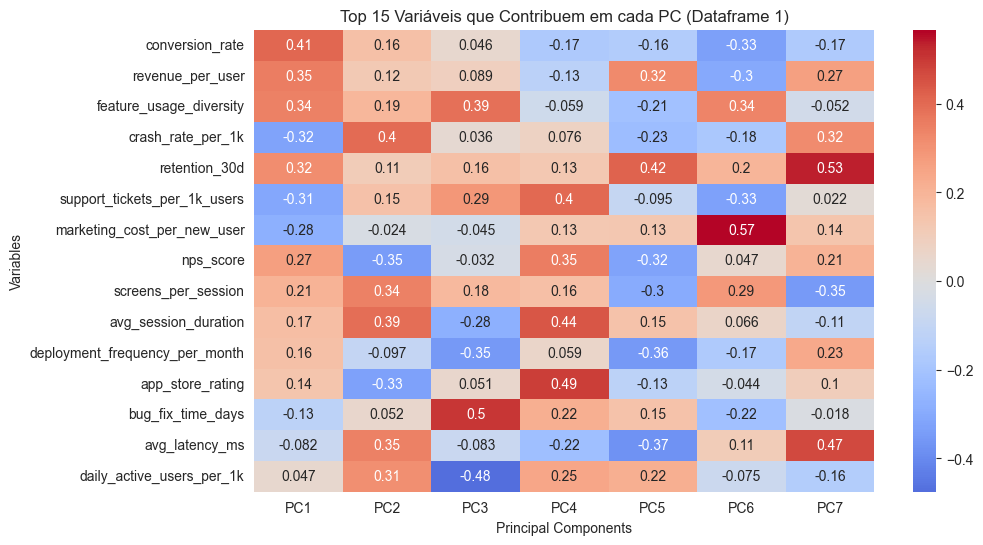

In [135]:
all_top_vars = list(dict.fromkeys(all_top_vars))
top_loadings = loadings.loc[all_top_vars]

plt.figure(figsize=(10,6))
sns.heatmap(top_loadings, annot=True, cmap="coolwarm", center=0)
plt.title(f"Top {top_n} Variáveis que Contribuem em cada PC (Dataframe 1)")
plt.ylabel("Variables")
plt.xlabel("Principal Components")

plt.savefig("heatmap_PCA_df1.png", dpi=300, bbox_inches='tight')
plt.show()

Os PCs avaliam as seguintes categorias:
- PC1: Valor do utilizador e utilização de features;
- PC2: Estabilidade na utilização da aplicação;
- PC3: Solução de bugs em comparação ao número de features lançadas;
- PC4: Satisfação do utilizador;
- PC5: Compromisso do utilizador apesar da insatisfação;
- PC6: Custo de aquisição comparando com o compromisso inicial;
- PC7: Eficiência do produto e fidelidade do utilizador;

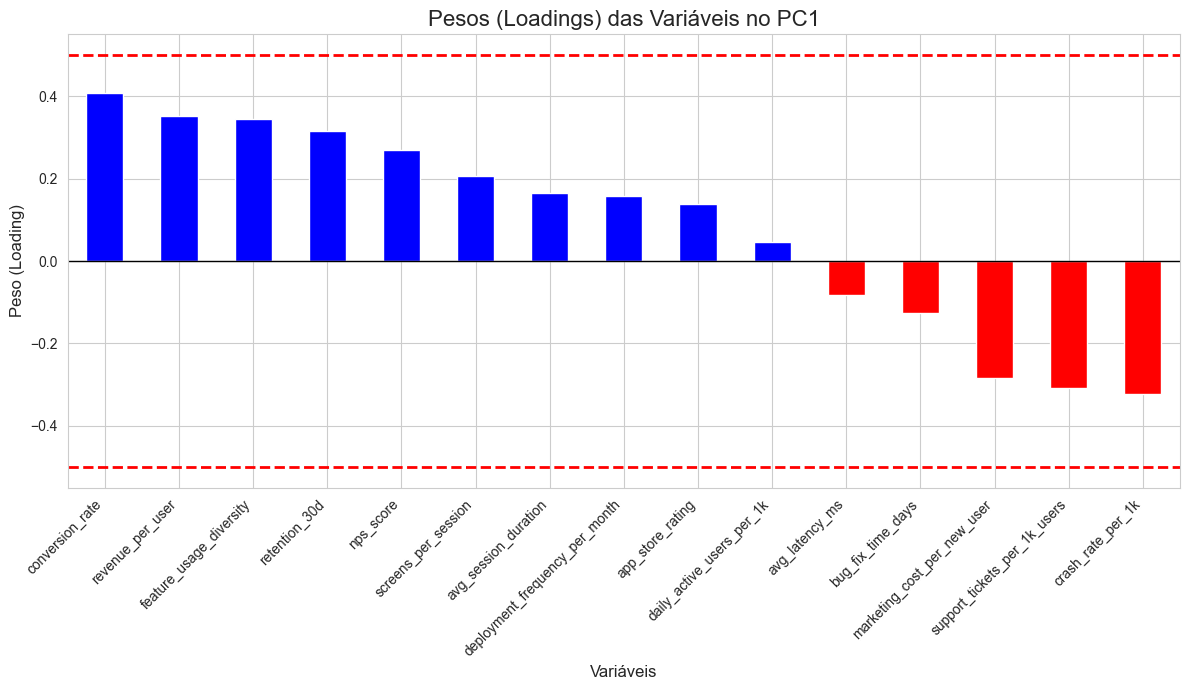

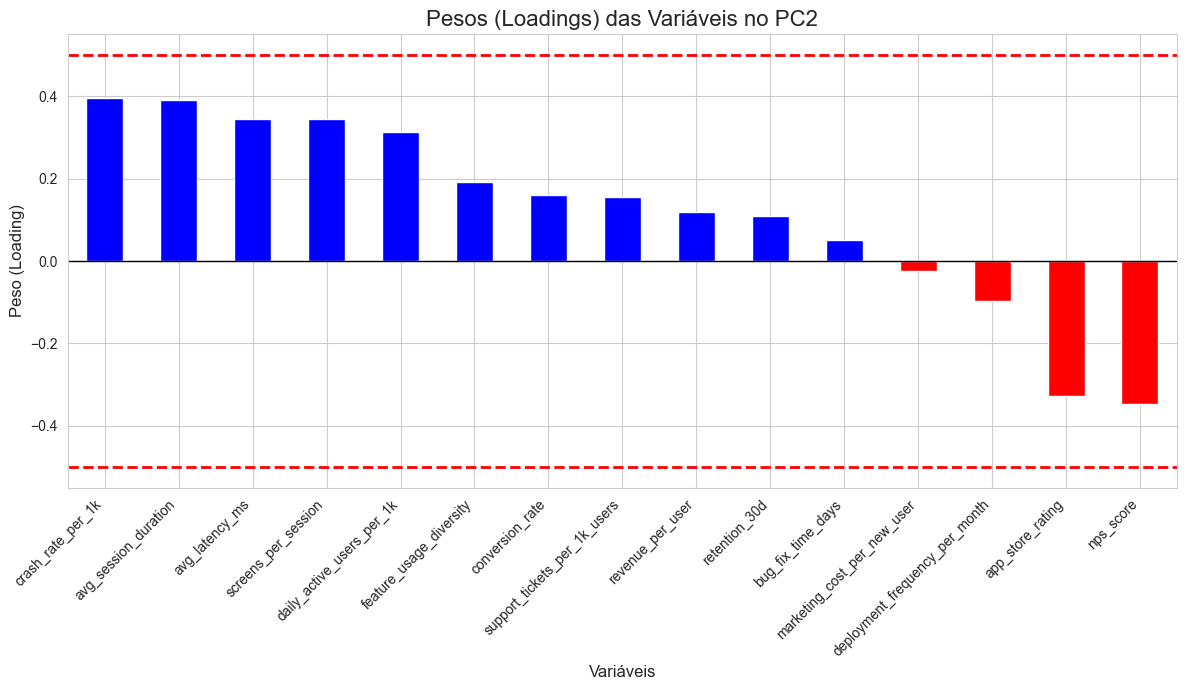

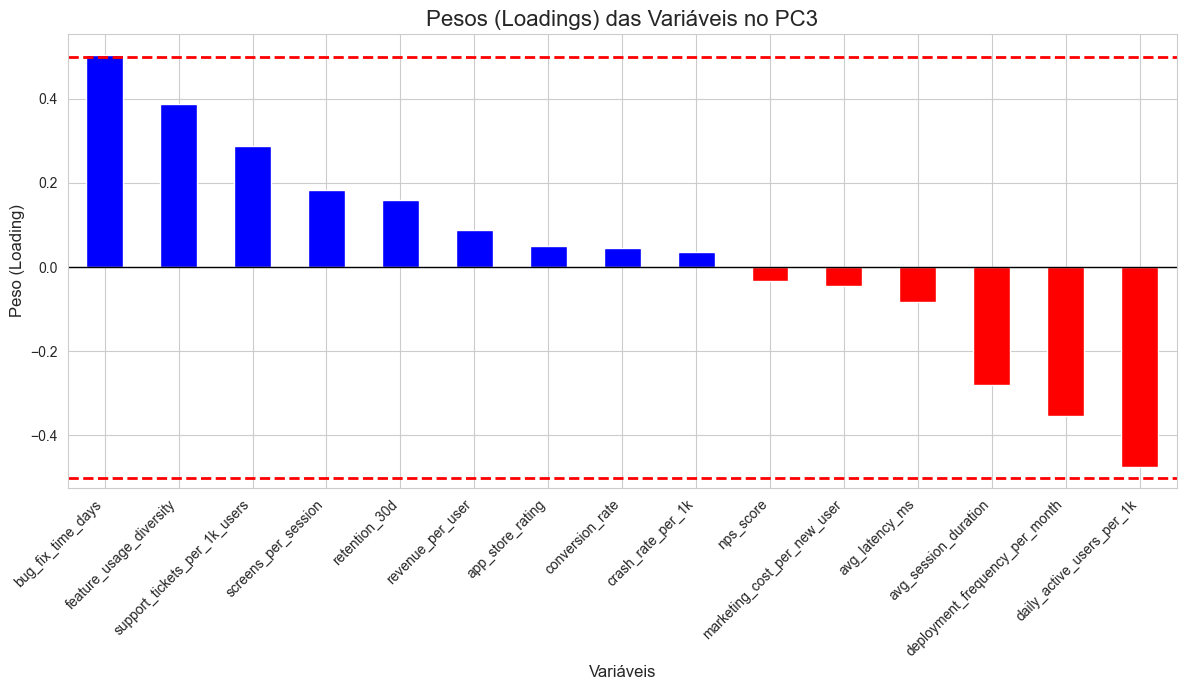

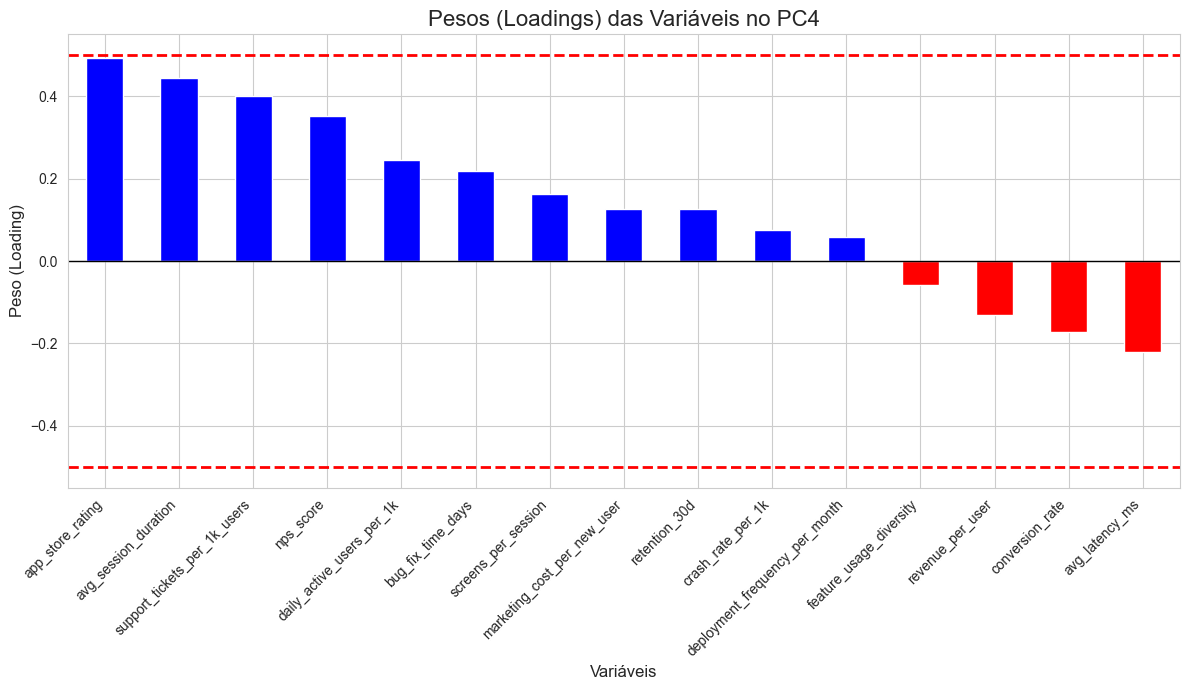

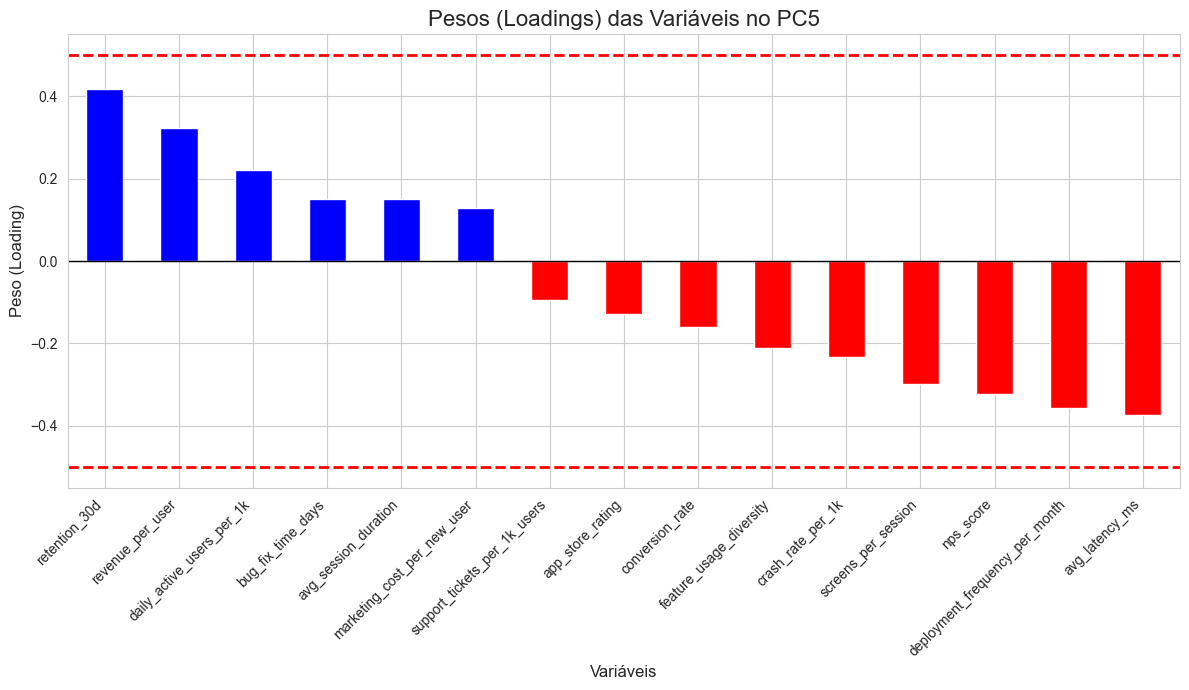

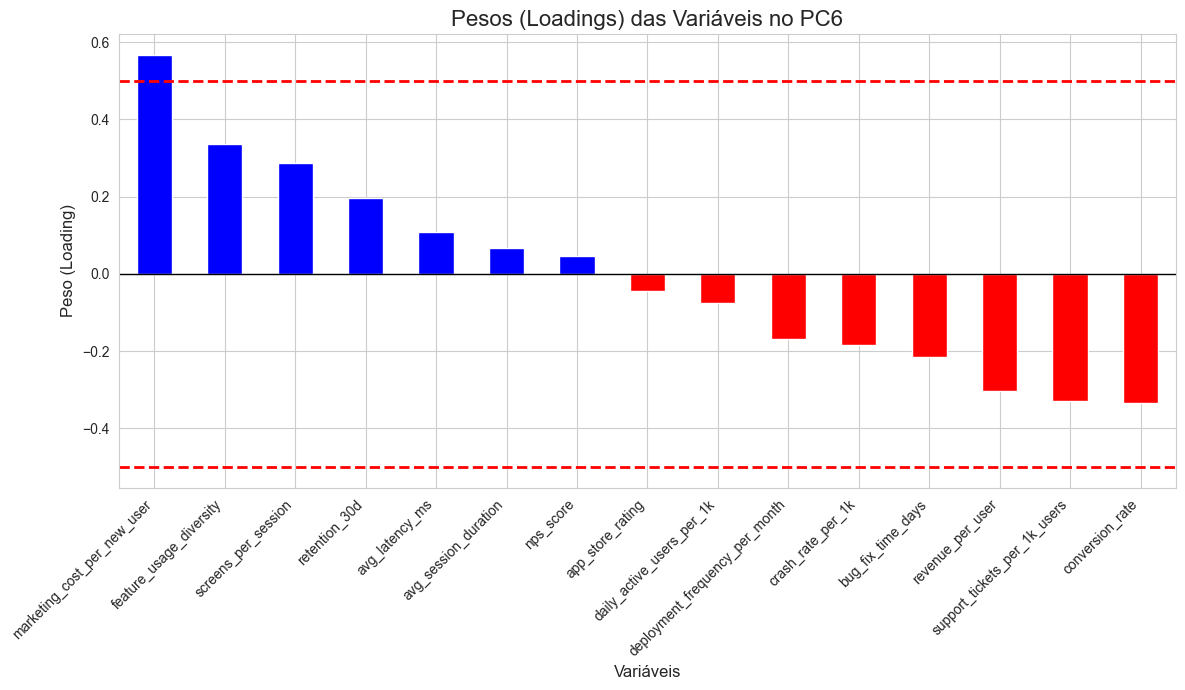

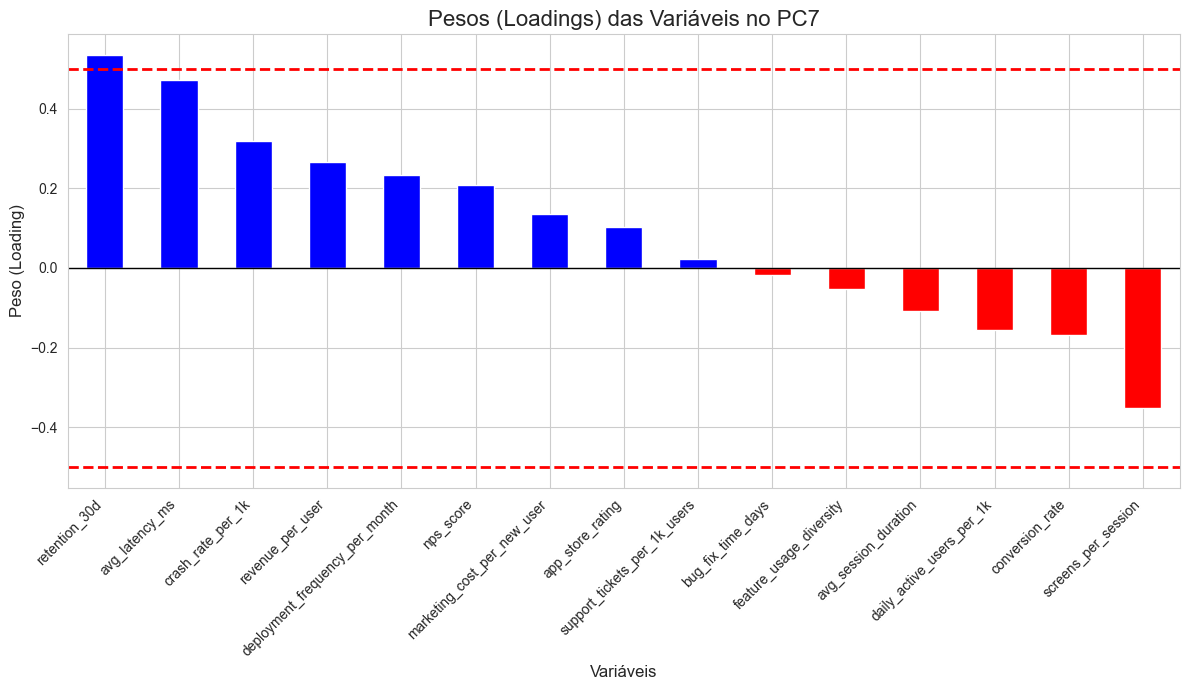

In [137]:
sns.set_style("whitegrid")

for pc in loadings.columns:
    loadings_pc = loadings[pc].sort_values(ascending=False)

    # Azul para loadings positivos, vermelho para negativos
    colors = ['blue' if x >= 0 else 'red' for x in loadings_pc]
    
    # Plot do gráfico de barras
    fig, ax = plt.subplots(figsize=(12, 7))
    loadings_pc.plot(kind='bar', ax=ax, color=colors)

    ax.axhline(0, color='black', linewidth=1.0)
    ax.set_title(f'Pesos (Loadings) das Variáveis no {pc}', fontsize=16)
    ax.set_xlabel('Variáveis', fontsize=12)
    ax.set_ylabel('Peso (Loading)', fontsize=12)

    plt.axhline(0.5, color='r', linestyle='--', linewidth=2)
    plt.axhline(-0.5, color='r', linestyle='--', linewidth=2)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    filename = f'graf_barras_{pc}_df1.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()

Os gráficos acima demonstram outra representação para entendermos melhor cada PC e o comportamento que cada variável tem no mesmo.

--> As variáveis a azul estão diretamente relacionadas com o PC;

--> As variáveis a vermelho estão inversamente relacionadas com o PC;

## 4.3.2 PCA Dataframe 2 (Drop de colunas com muitos NAN)
Do ponto 4.2 conseguimos obter os seguintes possíveis números para a quantidade de PCs a ser escolhida:
- Método da Variabilidade Explicada: **7**
- Método de Kaiser: **7**
- Método do Cotovelo (Scree Plot): **3,6,5,4**, por ordem de importância

### Assim iremos escolher 7 PCs para o PCA 2, visto que o valor é comun a dois dos três métodos.

In [138]:
df_2 = df_clean_2

X = df_2.select_dtypes(include=['float64', 'int64'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA - 7 componentes neste caso
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

df_pca_2 = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'])

# Peso de cada variável em cada PC
loadings = pd.DataFrame(pca.components_.T, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'], index=X.columns)

top_n = 14 # Número de Variáveis a visualizar
all_top_vars = []

for pc in loadings.columns:
    print(f"\nMaiores Contribuintes do {pc}:")
    # Sort de maior para menor
    sorted_loadings = loadings[pc].abs().sort_values(ascending=False)
    print(sorted_loadings.head(top_n))
    # Variáveis para o HeatMap
    all_top_vars.extend(sorted_loadings.head(top_n).index)




Maiores Contribuintes do PC1:
revenue_per_user                  0.352794
conversion_rate                   0.348322
support_tickets_per_1k_users      0.342256
crash_rate_per_1k                 0.327002
marketing_cost_per_new_user       0.313110
retention_30d                     0.289277
nps_score                         0.279693
avg_session_duration              0.258735
bug_fix_time_days                 0.237651
deployment_frequency_per_month    0.237461
screens_per_session               0.176768
app_store_rating                  0.150976
daily_active_users_per_1k         0.135484
avg_latency_ms                    0.134108
Name: PC1, dtype: float64

Maiores Contribuintes do PC2:
avg_session_duration              0.489520
crash_rate_per_1k                 0.441896
daily_active_users_per_1k         0.412972
avg_latency_ms                    0.297634
screens_per_session               0.294517
nps_score                         0.280421
app_store_rating                  0.210060
support_t

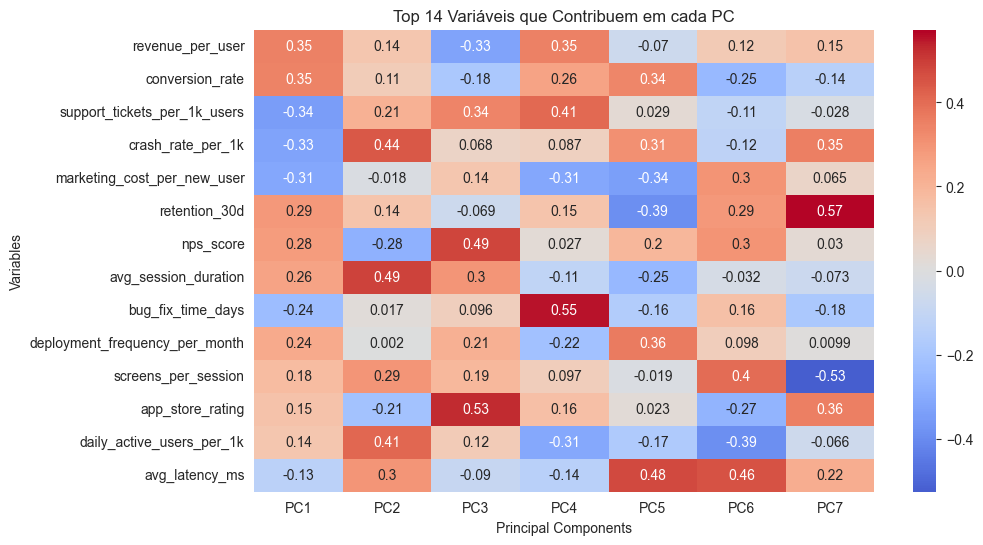

In [140]:
all_top_vars = list(dict.fromkeys(all_top_vars))
top_loadings = loadings.loc[all_top_vars]

plt.figure(figsize=(10,6))
sns.heatmap(top_loadings, annot=True, cmap="coolwarm", center=0)
plt.title(f"Top {top_n} Variáveis que Contribuem em cada PC")
plt.ylabel("Variables")
plt.xlabel("Principal Components")

plt.savefig("heatmap_PCA_2.png", dpi=300, bbox_inches='tight')
plt.show()

Os PCs avaliam as seguintes categorias:
- PC1: Valor do utilizador e falhas na aplicação;
- PC2: Duração de sessões e o impacto na aplicação;
- PC3: Solução de bugs em comparação ao número de features lançadas;
- PC4: Tempo de solução de bugs e número de utilizadores;
- PC5: Rapidez da aplicação e retenção de utilizadores;
- PC6: Rapidez da aplicação e quantidade de ecrãs;
- PC7: Retenção de utilizadores e quantidade de ecrãs utilizados;

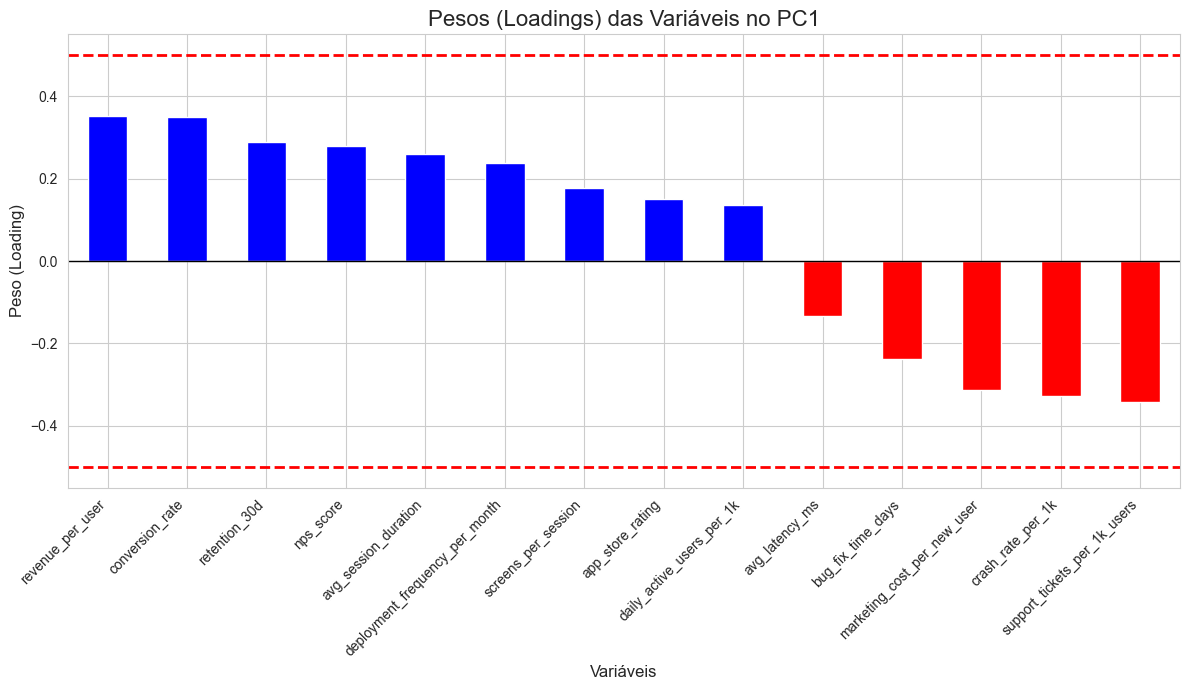

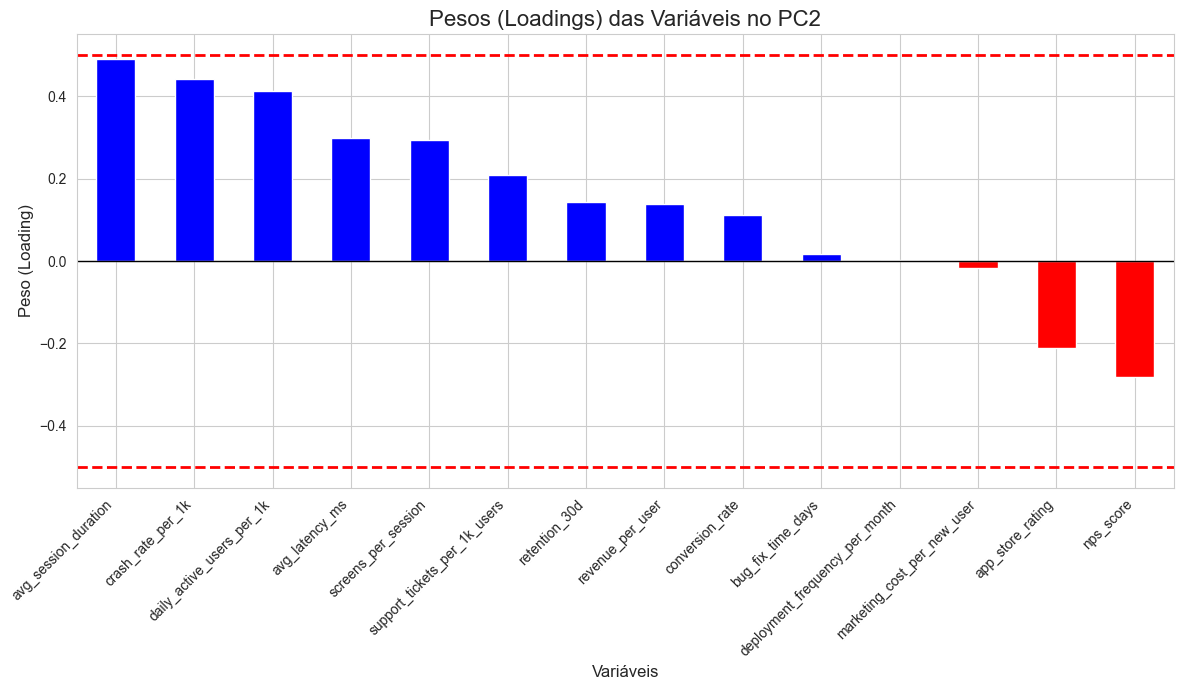

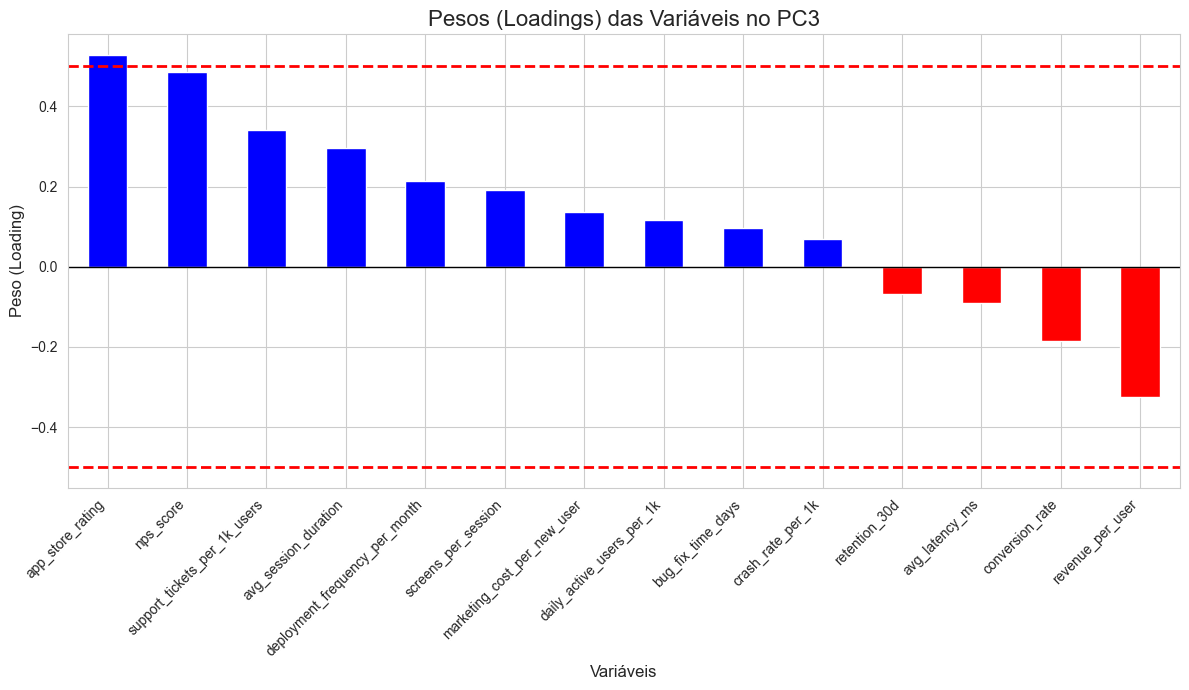

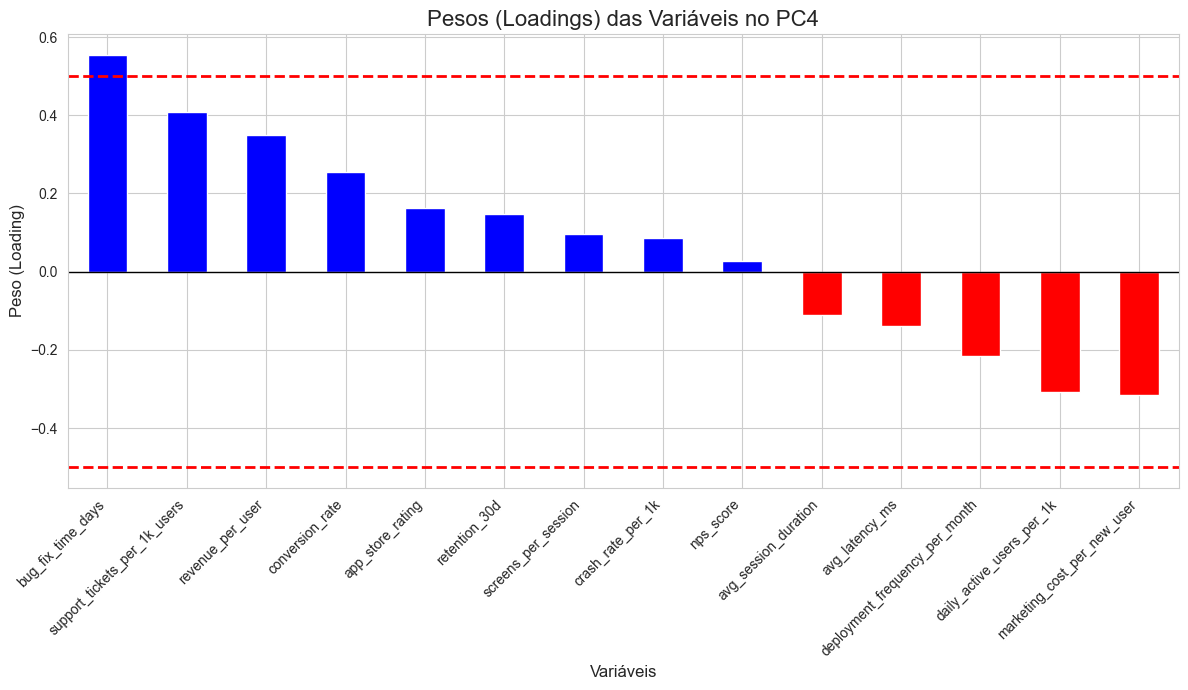

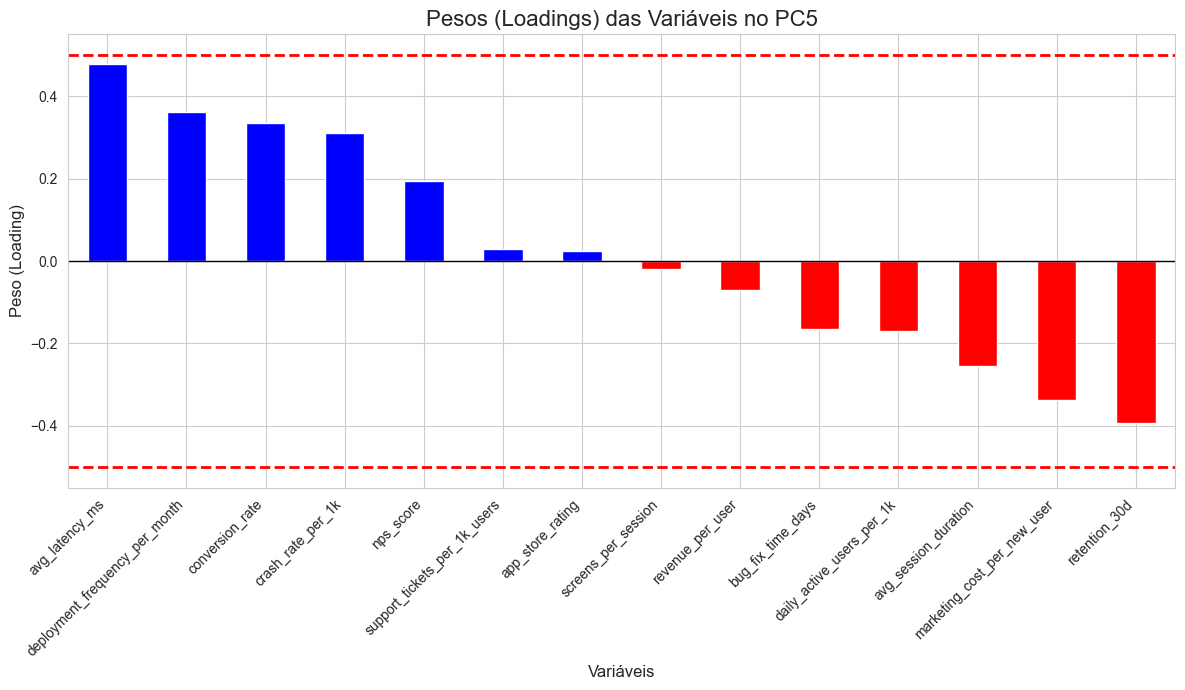

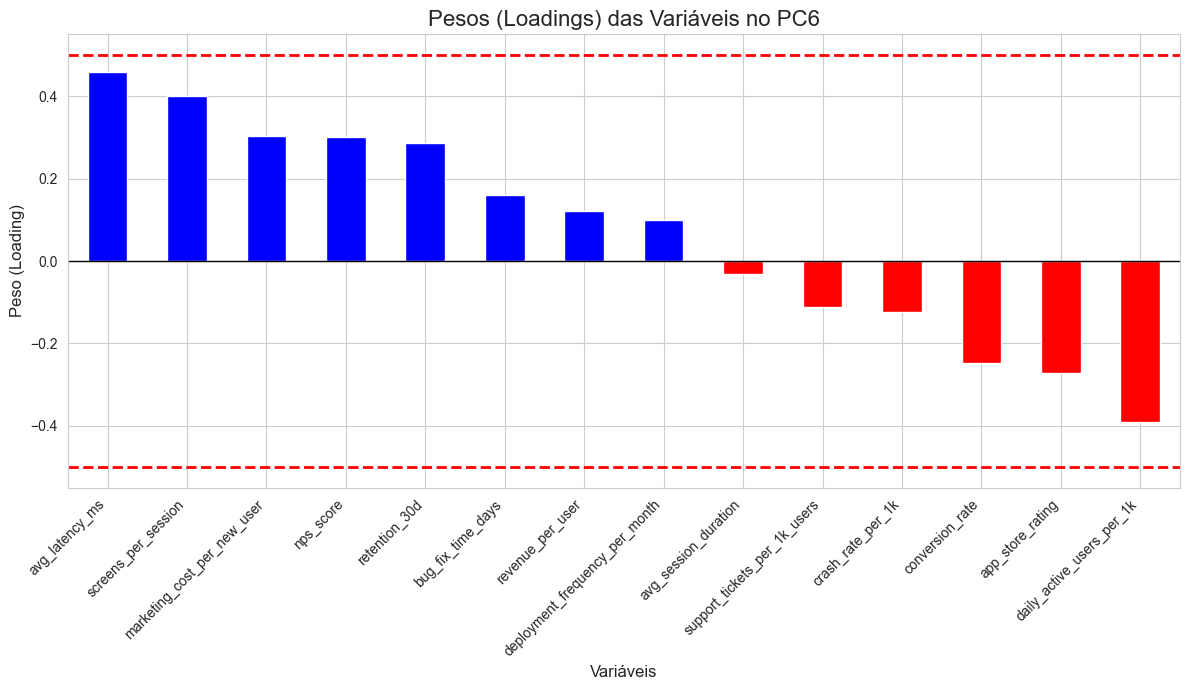

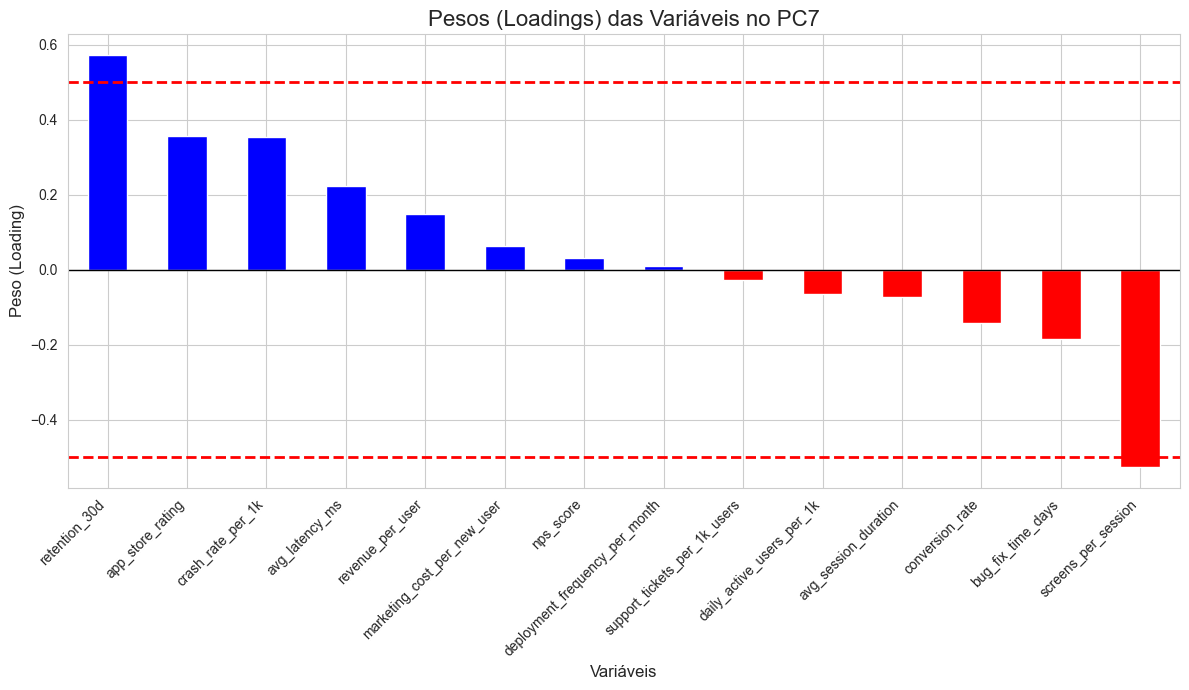

In [139]:
sns.set_style("whitegrid")

for pc in loadings.columns:
    loadings_pc = loadings[pc].sort_values(ascending=False)
    
    
    # Azul para loadings positivos, vermelho para negativos
    colors = ['blue' if x >= 0 else 'red' for x in loadings_pc]
    
    # Plot do gráfico de barras
    fig, ax = plt.subplots(figsize=(12, 7))
    loadings_pc.plot(kind='bar', ax=ax, color=colors)

    ax.axhline(0, color='black', linewidth=1.0)
    ax.set_title(f'Pesos (Loadings) das Variáveis no {pc}', fontsize=16)
    ax.set_xlabel('Variáveis', fontsize=12)
    ax.set_ylabel('Peso (Loading)', fontsize=12)
    
    plt.axhline(0.5, color='r', linestyle='--', linewidth=2)
    plt.axhline(-0.5, color='r', linestyle='--', linewidth=2)
    
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    filename = f'graf_barras_{pc}_df2.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')

    plt.show()

## 5.0 Conclusões

Depois de concluirmos o PCA para os dois dataframes reparamos que existe um ligeiro maior número de variáveis com *loadings* perto ou superiores a 0.5, valor a partir do qual consideramos que a variável tem uma correlação forte com o PC, mesmo assim esta quantidade é baixa sendo possivelmente de um erro quando fizemos a imputação dos valores NAN.

Apesar disso notamos que o facto de termos realizado o *drop* na coluna *"Feature Usage Diversity"* não provocou uma alteração tão notável nos resultados quanto o esperado.

Assim, e para desenvolvermos a análise pedida pela empresa, vamos utilizar o segundo *Dataframe*.